数据中的模式搜索问题时一个基础性的问题，也已经有了一段很长且成功的历史了。比如，16世纪对第谷·布拉赫的广泛天文观测使得约翰内斯·开普勒发现了行星运动的经验规律。从而为经典力学的发展提供了跳板。同样，原子光谱规律的发现在二十世纪早期量子物理学的发展和验证中起到了关键作用。模式识别领域涉及通过使用计算机算法自动发现数据中的规律性，并利用这些规律性采取措施，如将数据分类为不同类别。

考虑一个手写数字的例子，如图1.1。每个数字对应一个28×28像素的图像，因此可以用包含784个实数的矢量x表示。目的是创建一个模型将向量x作为输入，产生0...9这样的数字标识作为输出。这是一个非常重要的问题，因为手写的变化很大。我们可以使用手工规则或启发式方法根据笔画的形状来区分数字，但在实践中，这种方法会导致规则的扩散和规则例外情况等（规则只适合当前，不具有适应性），结果总是很糟糕。

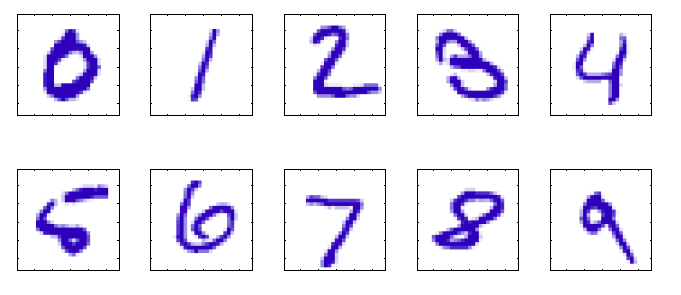

<center>图1.1 来自美国邮编的手写数字</center>

最好的方法就是采用一个机器学习方法，使用一个包含N个数字的数据集$\{X_1, \cdots, X_N\}$，我们称其为训练数据集，用这个数据集微调一个自适应模型的参数。训练集中数字的类别事先是知道的，一般会独自检查，手动打标。我们使用目标向量$t$表示一个数字的类别，再者代表了对应数字的识别。相关的使用向量来表示类别的技术过后我们会讨论。需要注意的是对于每个数字图像$x$都会对应着一个目标向量$t$。

机器学习执行的结果可以表示为一个函数$y(x)$，输入一个新的数字图像$x$，生成一个输出向量$y$，然后以同样的方式编码成目标向量。函数的标准形式$y(x)$被定义为训练阶段，也可称为学习阶段，这是训练数据的根本。一旦模型训练好后，可以使用它来识别一个新数字图像，这个过程被称作测试阶段。我们把不同于训练数据正确分类一个新样本的能力成为泛化。在实际应用中，输入向量变量可能只是所有输入向量的一小部分训练数据，所以泛化是模式识别中的主要目标。

对于大多数的实践应用，原始输入向量一般会进行预处理，把它们转换到新的变量空间中，期望这样，模式识别问题可以更好地解决。比如，在数字识别的问题中，数字图像一般会被转换和缩放到一个包含固定大小的盒子中。这很大程度上减少了每个数字类别中的变量，这样，所有数字的位置和幅度都相同，这也使得后面的模式识别算法更容易区分不同的类别。这个预处理步骤有时称为特征抽取。需要注意的是新的测试数据也需要与训练数据做同样的预处理。

预处理的实施可能也是为了加快计算。比如，如果我们的目标是对一个高分辨率的视频流进行实时人脸识别，计算机每秒都会处理大量的像素，如果直接将这些像素给到模式识别算法这在计算上可能是不可行的。取而代之的，是找到一个有用的特征来更快地计算，同时，也可以保留有用的歧义信息，使得可以区别出人脸和非人脸。这些特恒用于模式识别算法的输入。比如，矩形子区域上的图像强度的平均值可以很有有效地被评估（Viola and Jones, 2004），一组这样的特征集被证明在快速人脸识别上是很用的。因为遮掩的特征数要比所有的像素数要少很多，这样的预处理表示了一种维度约减的形式。在数据预处理的过程中也要小心那些可能因为数据信息丢失的问题，如果这个信息对于问题解决很重要的话，这会影响系统的整体准确度。

训练数据包含输入向量及其相应目标向量的示例的应用程序称为监督学习问题。如数字识别的例子，目的是将每个输入向量分配给有限数量的离散类别之一，这被称为分类问题。如果输出包含一个或多个连续变量，这样的任务呗称为回归。回归问题的一个例子是预测化学生产过程中的产量，其中输入包括反应物浓度、温度和压力。

在其它的模式识别问题中，训练数据由一组不带目标向量的输入向量x组合。这也那个的非监督学习问题的目标就是发现数据中相似的样本然后组合在一起，这被称为聚类，或者是探测输入空间中数据的分布，这就是所熟知的密度评估，或者是将高位数据映射到二维或三维为目的的降维。

最后，强化学习技术（Sutton和Barto，1998年）关注的是在特定情况下找到合适的行动，以最大限度地获得奖励。学习算法并不是给定输入样本的最优输出，相比监督学习，必须通过试错过程来发现它们。一般来说会有一系列的学习算法与环境交互产生的状态和动作。在许多例子中，当前的动作不会影响当即的奖励，但会影响所有后续的时间步。比如，通过在神经网络中使用合适的强化学习技术可以玩西洋棋到一个很高的水平（Tesauro, 1994）。在这里，网络必须学习以一个棋盘位置作为输入，联通掷骰子的结果，并产生一个强大的移动作为输出。网络需要拷贝100万次来完成这个游戏。一个最大的挑战就是西洋棋会包含几十个的移动，然而游戏的最后只是为了得到最好的奖励，以胜利的形式收场。奖励必须适当地归因于所有导致奖励的移动，即使有些移动是好的，有些是不好的。这里有一个心动卡发放问题的例子。强化学习的一个一般特征是在探索与利用之间进行权衡，在探索中，系统视图找出新的行动，看看它们有多有效；在利用中，系统利用已知会产生高回报的行动。过多地聚焦于探索或利用会导致不好的结果。强化学习持续是机器学习研究中的一个活跃领域。但详细的关系强化学习的阐述已经超出了本书的范畴。

尽管这些任务中的每一项都需要自己的工具和技术，但支持它们的许多关键思想对于所有这些问题来说都是共通的。本章的主要目的就是入门，以一种非正式的方式，这些概念中最重要的几个，我们会使用简单的例子加以说明。在本书的后面部分，我们将看到这些相同的想法在更复杂的模式中重现，这些模式适用于现实世界的模式识别应用。本章中也提供了一个自包含的将贯穿本书的三个重要工具，概率论，决策率和信息论。即使这些听起来让人生畏，事实上它们都是很直观的，如果机器学习技术想要在实际应用中有一个最好的效果，理解它们也是必须的。

#### 1.1 示例：多项式曲线拟合

我们开始介绍一个简单的回归问题，这个运行的例子将贯穿本章来激发一些关键概念。假设我们观测到一组实值输入向量$x$，我们希望使用这个观测数据来预测一个实值目标变量$t$的值。就目前而言，考虑使用综合生成数据的人工示例是有指导意义的，因为我们知道生成数据的精确过程，以便与任何学校模型进行比较。这个例子中的数据是从函数$\text{sin}(2\pi x)$生成的，目标值中也带有随机噪声，详细表述请看附录A。

假定给定一组由N个观测数据组成的训练数据集，记作$\mathbf{x}\equiv(x_1, \cdots, x_N)^{\intercal}$，同时关联观测目标数据$t$，表示成$\mathsf{t}\equiv(t_1, \cdots, t_N)^{\intercal}$。图1.2展示一个由$N=10$数据点组成的训练数据集。图像1.2中的数据生成于可采样数据$x_n, n=1, \cdots, N$，均匀分布与$[0, 1]$之间，为了表示每个数据点的相关值$t_n$，目标数据集$\mathsf{t}$来自函数$\text{sin}2\pi x$的首次计算值再加上一小部分的高斯分布（高斯分布将在第1.2.4节内容讨论）的随机噪声。以这种方法生成的数据，我们能够捕捉到真实数据集中的特性，即它们所具有的内在规律，也正是我们要去学习的，但是个别观测数据是带着随机噪声的。这种噪声生成于本质上随机过程，比如放射性衰减，但更一般地是由于哪些本身无法被观测到的变化源。

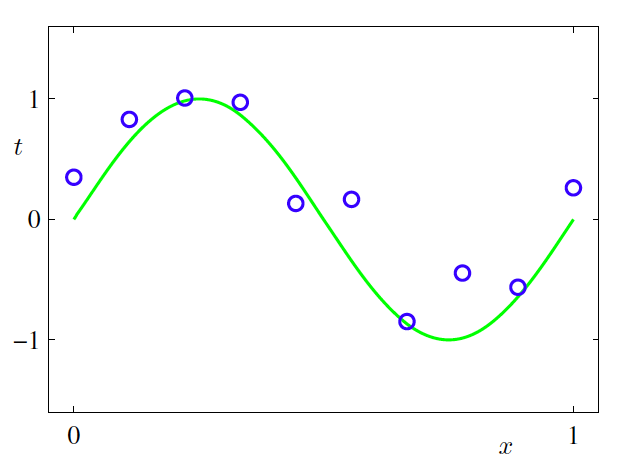

<center>图1.2 图中画的有$N=10$个数据点的训练数据，蓝色空心圆表示，每个输入变量的$x$观测都有一个相应的目标变量$t$。绿色曲线表示的是由函数$\text{sin}2\pi x$生成的数据得到的。我们的目标就是在不知道有绿色曲线的前提下，一些新的值$x$预测对应的目标值$t$。</center>

我们的目标是利用这些训练数据集来预测一些新输入变量值$\hat{x}$对应的目标值$\hat{t}$。过后我们会看到，这包含着试图发现基准函数$\text{sin}2\pi x$的隐含内容。从有限的数据集上概括规律这本质上也是一个很难的问题。此外，观测数据还带有噪声，对于一个给定$\hat{x}$，会有不确定性的相关的值$\hat{t}$。1.2节讨论的概率论，会提供一个框架以精确、定量的方法来阐述这些不确定性，1.5节讨论的决策理论，将允许我们利用概率表示根据合理的标准来做出最优预测。

现在，我们来以一种非正式的，考虑一个非常简单的曲线拟合问题。尤其，我们使用多项式函数来拟合数据

$$y(x, \mathsf{w}) = w_0 + w_1x + w_2x^2 + \cdots + w_Mx^M = \sum_{j=0}^Mw_jx^j$$

这里，$M$为多项式的阶数，$x^j$代表的是$x$的$j$次幂。多项式系数$w_0, \cdots, w_M$共同地表示成向量$\mathsf{w}$。需要注意的是，尽管多项式函数$y(x, \mathsf{w})$是$x$非线性函数，但确是系数$\mathsf{w}$的线性函数。函数，如多项式，在未知参数中是线性的，具有重要的性质，称为线性模型，将在第3章和第4张中广泛讨论。

系数值是由拟合训练数据的多项式决定的。这可以通过最小化错误函数来实现，最小化错误函数它能够衡量误拟合函数$y(x, \mathsf{w})$，在给定任意值$\mathsf{w}$，和训练数据集之间的关系。一个简单的选择就是误差函数，也是被广泛使用的，就是对于每个数据点$x_n$的预测$y(x, \mathsf{w})$，和相应的目标值$t_n$之间的平方和误差，所以我们就最小化如下

$$E(\mathsf{w}) = \frac{1}{2}\sum_{n=1}^N\{y(x, \mathsf(w)) - t_n\}^2$$

这里使用的1/2是为了后面的积分方便。过后在本章中，我们会讨论为什么会选择误差函数。现在我们很容易就可以注意到这个一个非负量，最小值有且也只能是零，函数$y(x, \mathsf(w))$会穿过每个训练数据点。其平方和误差的几何解释正如图1.3所示。

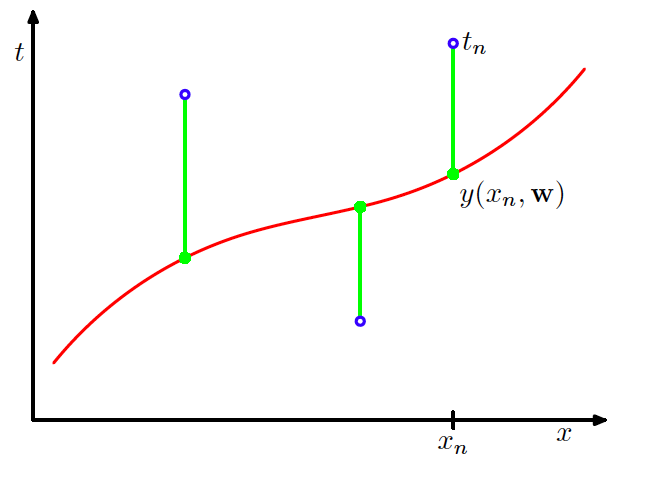

<center>图1.3 来自函数$y(x, \mathsf{w})$每个数据点所反应（一半）的平方和误差函数（1.2）的位移（图中绿色垂直线）</center>

我们通过最小化$E(w)$得到一个值$\mathsf{w}$来解决曲线拟合问题。因为误差函数是一个系数$\mathsf{w}$的二次型函数，关于系数的倒数在$\mathsf{w}$元素中也是线性的，所以最小化误差函数有唯一解，表示为$\mathsf{w}^*$，我们可以再闭合区间内找到该解。这个多项式的结果是由函数$y(x,\mathsf{w}^*)$给定的。

这里留了一个问题，对于$M$次幂的选择，我们可以看到这会引出一个重要的概念叫做模型比较，或模型选择。图1.4中，我们展示了4个有着幂$M=0,1,3$和$9$的多现实拟合数据集结果的例子。

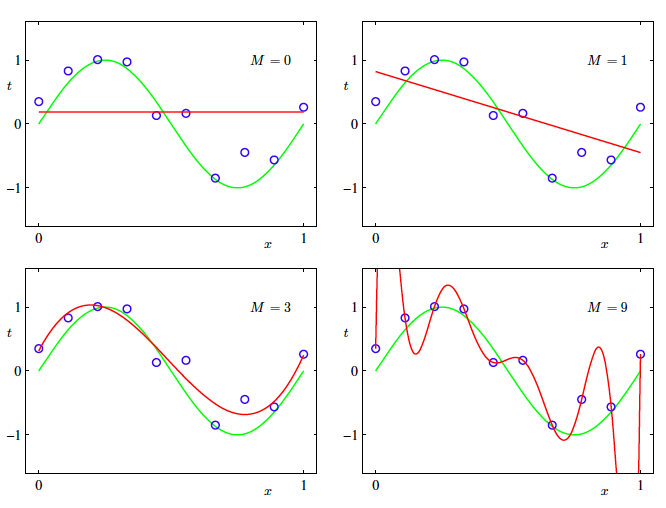

<center>图1.4 图中画的多项式有多个$M$次方，如红色曲线所示，拟合图1.2中的数据集</center>

我们注意到常量（M=0）和一阶（M=1）项拟合数据拟合的很差，因此他对函数$\text{sin}(2\pi x)$的表示也很差。三阶项（M=3）似乎是拟合函数$\text{sin}(2\pi x)$拟合的最好的例子，正如图中1.4所示。当我们看到更高项（M=9），我们得到一个非常好的训练集数据的拟合。事实上，多项式能够穿过所有的数据点，使得$E(\mathsf{w}^*)=0$。然而，拟合的曲线震荡得厉害，对函数$\text{sin}(2\pi x)$的表示也非常差。这种行为我们知道是过拟合。

正如我们已经知道的，我们的目标就是使得能够获得一个好的泛化的模型来对新数据进行预测。现在我们使用一个与训练数据生成一样流程的有着100数据点的度量测试数据集，该数据集在目标值中包含随机噪声值的新的选择，来定量了解泛化性能对$M$的依赖关系。对于每次$M$的选择，我们可以评估来自训练数据的1.2中给出的偏差值$E(\mathsf{w}^*)$，我们也可以评估测试集中的$E(\mathsf{w}^*)$。有时候我们使用均方根误差（RMS）来定义

$$E_{\text{RMS}} = \sqrt{2E(\mathsf{w}^*)/N}$$

式子中除以$N$使得我们相对平等地比较不同数据集大小上的误差值，平方根确保了$E_{\text{RMS}}$的测量与目标变量$t$在相同的尺度上（或相同的单位）。图1.5中画出了对于不同的$M$值，训练集和测试集上的RMS误差。测试集误差，它是用来衡量我们在新观测数据$x$得到的预测值$t$的有多好。我们注意到图1.5中小的$M$值得到的是更大的测试误差，这主要是因为响应的多项式相当的不灵活，并不能捕获函数$\text{sin}(2\pi x)$中的震荡。在$3 \le M \le 8$之间的$M$值得到的很小的测试误差，正如图中1.4看到的，$M=3$时，表示的生成函数$\text{sin}(2\pi x)$最好。

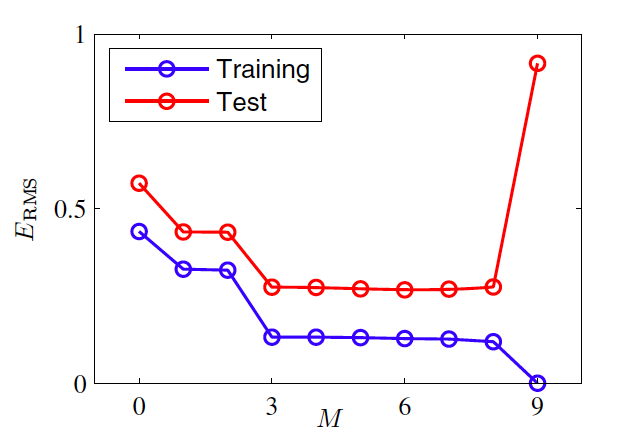

<center>正如1.3中定义画出的均方根误差，评估了不同$M$值在训练集和测试集上的误差</center>

当$M=9$时，训练数据集的误差掉到了0，这可能正是我们所期望的，因为多项式包含10个自由度，它表示10个相关系数$w_0, \cdots, w_9$，能够精确地微调到拟合训练集中中10个数据点。尽管如此，测试集误差会变得异常的大，正如图1.4所见，相关的函数$y(x, \mathsf{w}^*)$也震荡的厉害。

这似乎是自相矛盾的，因为给定阶的多项式，它包含所有低阶多项式的特殊情况。$M=9$多项式因此，能够得到至少和$M=3$多项式一样好的结果。此外，我们可以假设新数据的最好的预测模型应该是从函数$\text{sin}(2\pi x)$中生成的数据（稍后我们会看到确实如此）。我们知道函数$\text{sin}(2\pi x)$的幂级展开包含所有阶的项，因此我们可能会期望结果会随着$M$的增加而单调递增。

我们可以将视角转换到通过测试不同次幂的系数$\mathsf{w}^*$值来观测问题，如表1.1所示。我们可以看到，随着$M$的增加，系数的震荡也会更大。尤其在$M=9$时，通过多项式函数精准地匹配每个数据点得到的大的正值和负值，系数被微调得最佳，但是在数据点（尤其在接近结尾处）函数表现得更加大的震荡，正如图1.4所示。直观地来说，所发生的是有着更大$M$值更灵活的多项式会越来越适应目标值上的随机噪声。

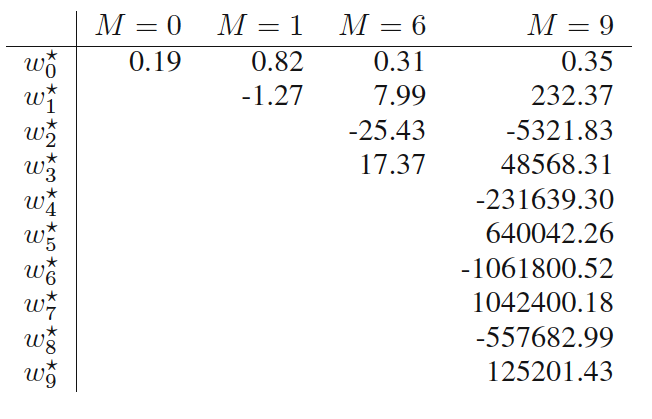

<center>表1.1 表中各种次幂的多项式系数$\mathsf{w}^*$。观察多项式次幂的增加会引起系数的戏剧性震荡变化。</center>

如图1.6所示，当数据集大小发生变化时，检查给定模型的行为是很有趣的。我们可以看到，在给定模型复杂度的情况下，过拟合问题会随着数据集大小的增加而减小。另一种说法就是，数据量越大，我们能够适应数据的模型就越复杂。有时提倡的一种粗略的启发式方法是，数据点的数量不应小于模型中自适应参数数量的倍数（例如5或10）。但是，正如我们将在第3章中看到的，参数的数量不一定是模型复杂性的最适当的度量。

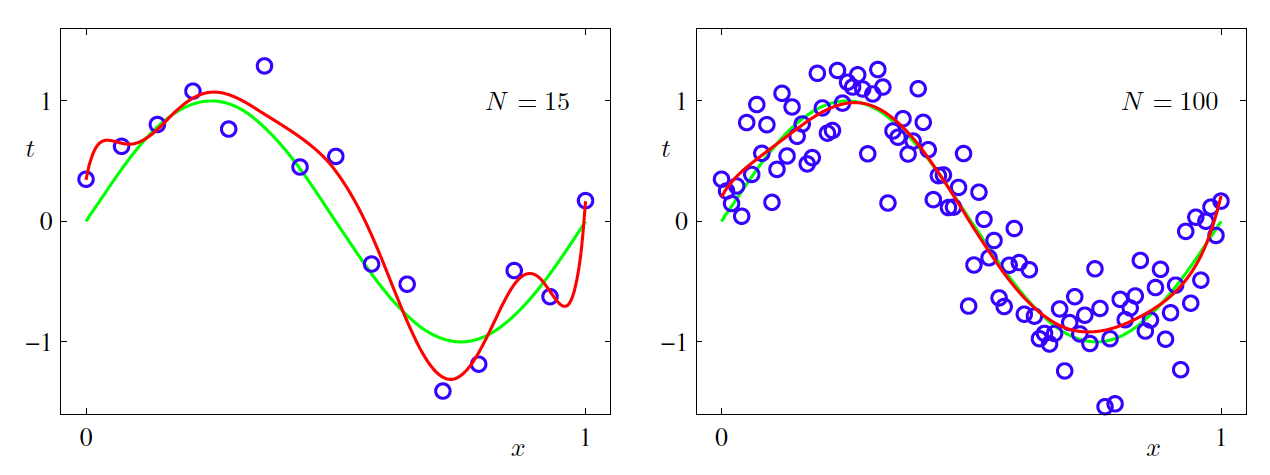

<center>图1.6 图中画的是通过使用最小化均方误差函数使用的$M=9$多项式的$N=15$个数据点（左图）和$N=100$个数据点（右图）得到的。我们可以看到数据集大小的增加会减少过拟合问题。</center>

此外，对于必须根据可用训练集的大小限制模型中的参数数量，也会有一些令人不满意的地方。根据要解决问题的复杂度来选择模型的复杂度才更加合理。我们将会看到最小二乘试图找到模型参数表示的最大似然的具体情况（在第1.2.5节中讨论），过拟合问题呗理解为是最大似然的一般性质。通过使用贝叶斯方法，过拟合问题就可以避免。从贝叶斯的角度来看，使用参数数量大大超过数据点数量的模型并不困难。事实上，在贝叶斯模型中，有效的参数数量是自适应数据集大小的。

然而，现在，我们还得继续使用现有的方法，并考虑在实际中我们所使用的数据集限制，对于使用复杂和灵活的模型来说，还是有指导意义的。我们有一种技术经常是用来控制过拟合现象的，我们叫做正则化，它是加入一错误函数的惩罚项，为了防止系数变得更大。这个简单的正则化项时所有系数的平方和形式，一个带修正的误差函数形式如下

$$\tilde{E}(\mathsf{w}) = \frac{1}{2}\{y(x_n,\mathsf{w}) - t_n\}^2 + \frac{\lambda}{2}\|\mathsf{w}\|^2$$

其中$\|\mathsf{w}\|^2=\mathsf{w}^{\intercal}\mathsf{w}=w_0^2 + w_1^2 + \cdots + w_M^2$，系数$\lambda$表示的是相应的正则化项相比于均方误差项的重要程度。需要注意的是一般系数$w_0$在正则化项中是省略的，因为如果包含的话，其结果会取决于目标变量的来源选择（hastie等人，2001），或者也可以包括进去，但会有它自己的正则化系数（我们会在5.5.1节讨论这个话题）。同样，1.4中的误差函数可以再闭区间找到最小化解。我们知道的在统计学中使用的技术有收缩法，因为它们会减小系数的值。一个二次型的特例就是岭回归（Hoerl和Kennard，1970年）。在神经网络中，这种方法叫做权重衰减。

图1.7中展示的是$M=9$次幂拟合与之前相同的数据，但使用了1.4中的正则化误差函数的结果。我们看到，$\ln \lambda=-18$的值，过拟合已经被抑制了，我们得到一个更加接近基函数$\text{sin}2\pi x$的闭合表示。倘若，我们使用一个太大的$\lambda$值，我们还是会得到一个差的拟合，如图中$\ln \lambda=0$1.7所示。来自拟合多项式的相应系数如表1.2所示，显示了正则化在对减少系数的震荡带来的积极作用。

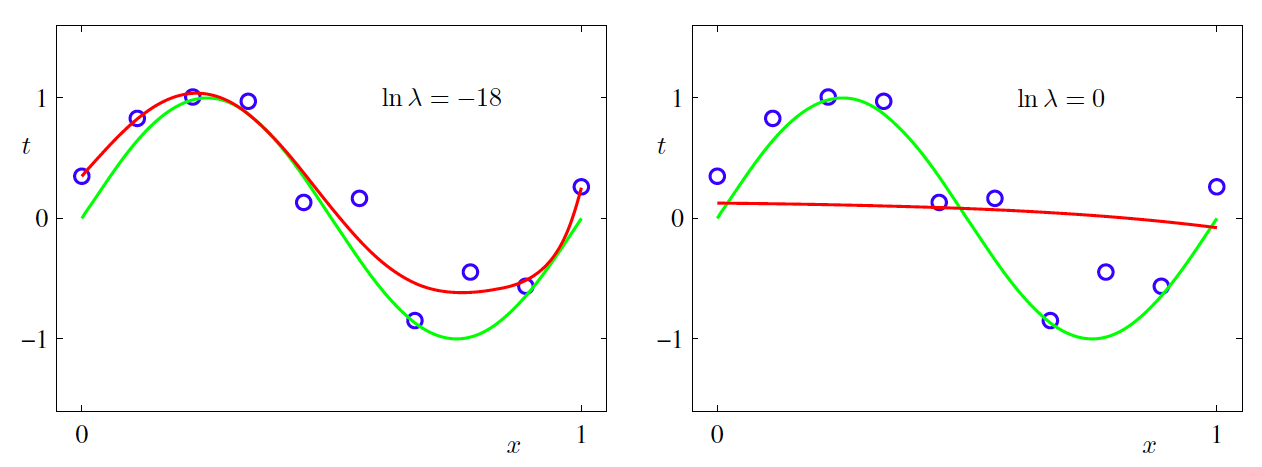

<center>图1.7 图中画的是$M=9$多项式拟合在图1.2中使用的数据集，1.4中使用的正则化误差，两个正则化参数$\lambda$相应的是$\ln \lambda=-18$和$\ln \lambda=0$。比如$\lambda=0$，就相当于没有正则化，对应的$\ln \lambda=-∞$，如图右下角显示的那样。</center>

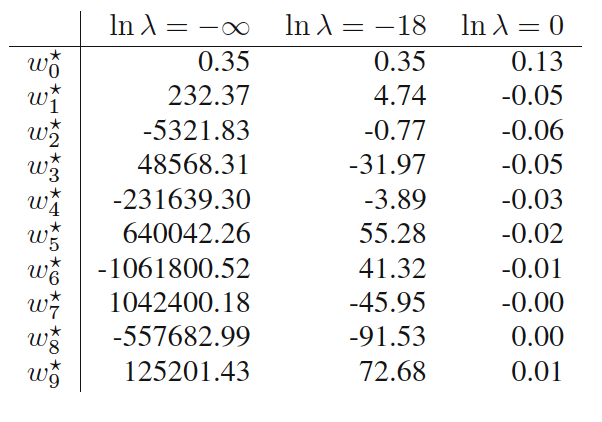

<center>表1.2 表中系数$\mathsf{w}^*$是$M=9$次幂的多项式各种正则化参数$\lambda$的结果。注意的是$\ln\lambda=-∞$表示的是模型没有正则化，就如图1.4中右下角所示。我们看到，随着$\lambda$值的增加，典型的系数震荡变得更小了。</center>

在训练集和测试集上使用的$\ln\lambda$正则化项产生在泛化误差的影响，可以通过图1.3中画的均方误差值来体现。我们可以看到$\lambda$控制模型的有效复杂度，进而确定这过拟合的程度。

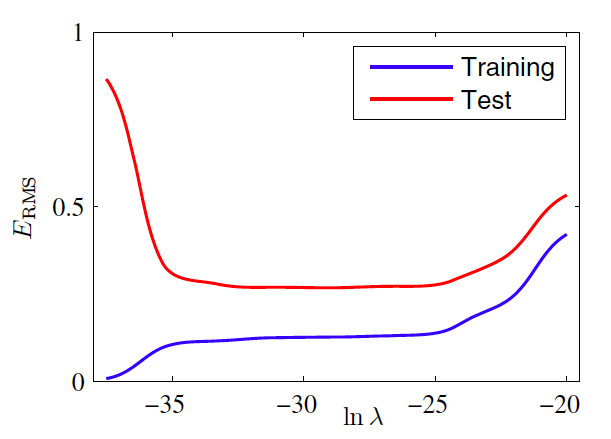

<center>$M=9$多项式的均方根误差（1.3）与$\ln\lambda$的关系图。</center>

模型复杂度是一个重要的部分，将在1.3节中讨论。这里我们需要注意的是，如果我们在尝试解决实际问题时仍使用最小化误差函数方法，我们找到一种方法来定义模型复杂度的合理值。上面的结果建议了一条简单的实现方法，就是可用的数据，然后将其划分成训练集，用于决定系数$\mathsf{w}$，和一个验证集，也称为留出集，用来最小化模型复杂度（要么$M$或$\lambda$）。在许多例子中，尽管，这很浪费有价值的训练数据，我们需要搜寻更加有意义的方法。

迄今为止，我们讨论的多项式曲线拟合很大程度上是直觉的。我们现在搜索一个更加本质性的方法来解决模式识别中的问题，将问题转向概率论的讨论。也为本书后续发展提供了基础，这会引导我们看到之前说的多项式曲线拟合更加重要的视角，这也会允许我们将其扩展到更加复杂的情形中去。

#### 1.2 概率论

模式识别领域内的重要内容就是不确定性。它既通过噪声中的测量产生，又通过有限大小的数据集产生。概率论为不确定性的量化和操纵提供了一个一致性的框架，形成了模式识别的核心基础之一。当与1.5节讨论的决策理论结合起来的时候，在给定所有可用信息的时候，能够做出最优预测，即使信息可能不完整，或者异常。

我们将通过考虑一个简单的例子来介绍概率论的基础。假设我们有两个盒子，一个红的和一个蓝的，在红色盒子中，我们有2个苹果和6个橘子，在蓝色盒子中，有3个苹果和1个橘子。如图1.9所示。现在假设我们从盒子中随机取一个，再从盒子中随机选择一个水果，在观察到是哪种水谷后，再把它放进盒子里。我们会重复这个过程很多次。我们假设这样做的时候，我们会有40%的机会选择红盒子，60%的选择蓝盒子，当我们从盒子里取出一个水果时，它有可能是任一种。

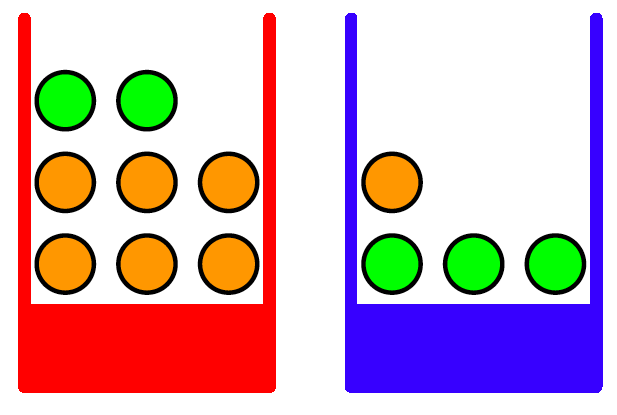

<center>图1.9 我们使用的简单例子是两个有颜色的盒子，都包含有水果（绿色表示评估，橙色表示橘子）来介绍基本概率思想。</center>

在这个例子中，将要选择的盒子是一个随机变量，我们表示成$B$。这个随机变量可以是两个可能值中的一个，即$r$（对应到红色盒子），或者$b$（对应到蓝色盒子）。类似的，水果的识别也是一个随机变量，表示成$F$。它可以是值$a$（苹果）和$o$（橘子）。

开始，我们将一个事件的概率定义为该事件在总试验次数中发生的次数，试验次数在达到无穷大的范围内。因此我们有红色盒子被选中的概率为$4/10$，绿色盒子被选中的概率为$6/10$。我们将这些概率记作$p(B=r)=4/10$和$p(B=b)=6/10$。需要注意的是，根据定义，概率范围必须在$[0,1]$之间。同时，如果事件相互独立，它们包含所有可能的结果（比如，在这个例子中盒子要么是红色，要么是蓝色），那么我们可以看到所有事件的概率加和必须为1。

我们现在可以问这些的问题：“选择程序选中苹果的总概率是多少？”，或者“如果说我们已经选中了一个橘子，那它是从蓝色盒子中选出的概率是多少？”我们可以回答这些问题，事实上，在模式识别中会有更加复杂的问题，一旦我们掌握了两个基本的概率规则，加和规则和乘积规则。在获得这些规则后，我们重回水果盒的例子。

为了得到概率的规则，考虑一个更加通用的例子如如1.10所示包含两个随机变量$X$和$Y$（比如上面我们考虑的水果和盒子两个随机变量）。我们假设$X$可以是值$x_i$中任意取值，其中$i=1,\cdots, M$，$Y$可以取值于$y_j$，$j=1,\cdots,L$。考虑我们总共进行了$N$次试验，同时从变量$X$和$Y$中取样，试验的次数在$X=x_i$和$Y=y_j$表示为$n_{ij}$。让$X$取$x_i$（无关乎$Y$的取值）的试验次数用$c_i$表示，类似的，让$Y$的取值$y_j$的试验次数用$r_j$表示。

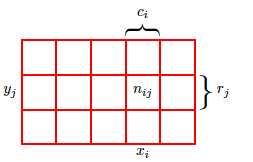

<center>图1.10 我们可以通过考虑两个随机变量得到概率和和概率积规律，这两个随机变量，其中$X$取自于值${x_i}$，$i=1,\cdots,M$，$Y$取自值$y_j$，$j=1,\cdots,L$。图中我们有$M=5$和$L=3$。我们考虑这些变量的$N$个实例，对应的我们用$n_{ij}$表示实例数，当$X=x_i$和$Y=y_j$，这里的$n_{ij}$是数列单元中的总点数，列$i$的数量，对应的$X=x_i$，表示成$c_i$，行$j$中的点，对应到$Y=y_j$表示为$r_j$。</center>

概率中$X$取自$x_i$，$Y$和取自$y_j$被写作$p(X=x_i, Y=y_j)$，我们称之为$X=x_i$和$Y=y_j$的联合概率。它由落在单元$i,j$的点数作为总点数的分数给出，因此有

$$p(X=x_i,Y=y_j)=\frac{n_{ij}}{N}$$

这里默认我们认为$N \to ∞$的条件限制。类似的，$X$取值$x_i$无关于$Y$的概率写作$p(X=x_i)$，是由落在第$i$列中的点的总数分数给出，因此有

$$p(X=x_i)=\frac{c_i}{N}$$

因为图1.10中的列$i$实例数时该列每个单元实例数的和，我们有$c_i=\sum_jn_{ij}$，因此，从1.5和1.6中，我们有

$$p(X=x_i)=\sum_{j=1}^Lp(X=x_i,Y=y_j)$$

这是概率加和规则。需要注意的是$p(X=x_i)$有时候称为边缘概率，因为它是由边缘获得，或者求出其他变量（这里是$Y$）。

如果我们考虑只有$X=x_i$的实例，$Y=y_j$的实例概率写作$p(Y=y_j \mid X=x_i)$叫做在给定$X=x_i$下的$Y=y_j$的条件概率。我们可以用个落在单元$i,j$与列$i$中的数据点得到，因此可以按如下给出

$$p(Y=y_j \mid X=x_i) = \frac{n_{ij}}{c_i}$$

从1.5， 1.6和1.8中，我们可以得到以下关系

$$\begin{align*}
p(X=x_i,Y=y_j) &= \frac{n_{ij}}{N} = \frac{n_{ij}}{c_i}\cdot\frac{c_i}{N} \\
&= p(Y=y_j \mid X=x_i)p(X=x_i)
\end{align*}$$

这被称为概率的乘法规则。

迄今为止，我们已经仔细介绍了一个随机变量，如在水果例子中的盒子$B$，随机变量的值，可取自，比如盒子是红色的话，那就是$r$。因此$B$取$r$的概率表示成$p(B=r)$。尽管这能帮助我们避免歧义，但这也会带来很多的数学符号，在很多例子中，也根本不需要这么纠结的。取而代之的，我们可能就会简单的写作$p(B)$来表示随机变量$B$的分布，或者是$p(r)$来表示特殊值$r$的分布评估，它提供了一个上下文的解释。

有了这个更紧凑的符号，我们可以以下面形式写出两条基本的概率论规则

>概率规则
$$\text{sum rule} \hspace{0.5cm} p(X)=\sum_{Y}p(X,Y)$$
$$\text{product rule} \hspace{0.5cm} p(X,Y)=\sum_{Y \mid X}p(X)$$

这里$p(X,Y)$是联合概率，描述为$X$和$Y$的共同概率。类似的，$p(Y \mid X)$是条件概率，描述为在给定$X$下$Y$的概率，$p(X)$是边缘概率，简单地表示为$X$的概率。这两个简单的概率基础规则将贯穿本书。

对于乘法规则，拥有对称特性$p(X,Y)=p(Y,X)$，我们可以立即获得以下条件概率关系

$$p(Y \mid X) = \frac{p(X \mid Y)p(Y)}{p(X)}$$

这被称作贝叶斯定理，在模式识别和机器学习中占据中心地位。使用加法规律，贝叶斯定理中的分母可以用分子中项来表示

$$p(X) = \sum_Yp(X \mid Y)p(Y)$$

我们可以观察到贝叶斯定理中的分母部分，作为标准化常量需要确保左半边遍历所有值$Y$的条件概率加和为1。

在图1.11中，我们展示了一个包含两个变量的联合概率的简单例子来绘制出边缘和条件分布的内容。这里有一个有限样本$N=60$的数据点通过联合概率画出来，显示在左上边。在右上。右上是$Y$的两个值的每个柱状图表示的数据点概率。从概率的定义来看，这些分数应该等价于当$N \to ∞$时$p(Y)$的概率。我们可以看到一个直方图以一种简单的方式建模了在给定有限数据点情况下的概率分布。从数据中建模概率分布是统计模式识别中的核心，这本书中将重点探索。1.11中剩余的两个图表示的是$p(X)$和$p(X \mid Y=1)$的脂肪概率评估。

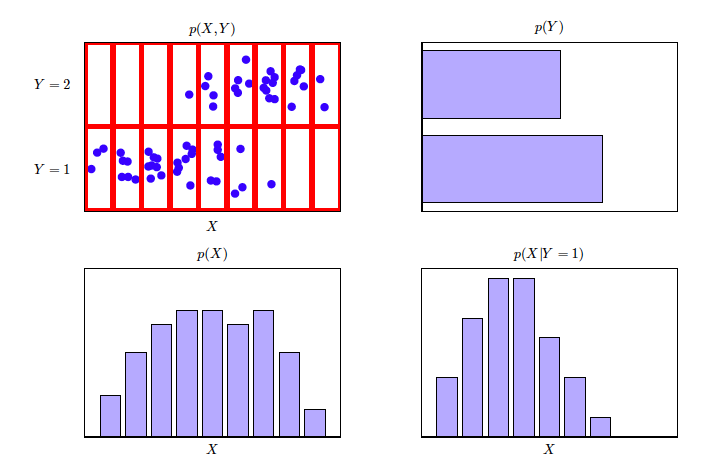

<center>图1.11 图中绘制的两个变量的分布，$X$取9个可能的值，$Y$取两个值左上图展示了一个有着60个数据点的在这些变量上的联合概率分布。左下的图中展示了边缘分布$p(X)$和$p(Y)$的直方图评估，可以使用右边的条件分布$p(X \mid Y=1)$来表示。</center>

让我们回到包含水果盒子的李忠。现在，我们应该能够明确区分随机变量和实例化。我们已经明白了在选择要么红色或蓝色盒子的概率

$$p(B=r) = 4/10$$
$$p(B=b) = 6/10$$

这些需要满足$p(B=r)+p(B=b)=1$。

现在假设我们随机选择一个盒子，结果选到是蓝色的盒子。那么选到苹果在蓝色盒子中的分数是$3/4$，如是$p(F=a \mid B=b)=3/4$。事实上，我们可以写出在给定选中的盒子情况下四种类型的水果的条件概率

$$p(F=a \mid B=r) = 1/4$$
$$p(F=o \mid B=r) = 3/4$$
$$p(F=a \mid B=b) = 3/4$$
$$p(F=o \mid B=b) = 1/4$$

同样，这些概率的标准化后

$$p(F=a \mid B=r) + p(F=o \mid B=r)=1$$

类似的

$$p(F=a \mid B=b) + p(F=o \mid B=b)=1$$

我们可以使用加和和乘积概率规则来评估选中评估的概率

$$\begin{align*}
p(F=a) &= p(F=a \mid B=r)p(B=r) + p(F=a \mid B=b)p(B=b) \\
&= \frac{1}{4} \times \frac{4}{10} + \frac{3}{4} \times \frac{6}{10} = \frac{11}{20}
\end{align*}$$

接着我们使用加号规则，有$p(F=o)=1-11/20=9/20$。

假设我们知道已经选中了一个水果，且是橘子，我们想知道它来自哪个盒子。这需要我们评估在已知水果的情况下来评估被选中盒子的概率分布，1.16-1.19给出了在已知盒子的情况下，水果的概率分布。我们可以使用贝叶斯定理来解决反向条件概率问题

$$p(B=r \mid F=o) = \frac{p(F=o \mid B=r)p(B=r)}{p(F=o)} = \frac{3}{4} \times \frac{4}{10} \times \frac{20}{9} = \frac{2}{3}$$

使用加和规则，我们有$p(B=b \mid F=o)=1-2/3=1/3$。

我们可以提供一个对于贝叶斯定理的重要解释。如果我们在被告知选中哪个水果之前知道已经选中哪个盒子，我们能用的完整信息有$p(B)$。我们将其叫做先验概率，因为它是在观测到水果之前的可用概率。一旦我们被告知水果是橘子时，我们可以使用贝叶斯定理来计算概率$p(B \mid F)$，我们把它叫做后验概率因为他是在观测到$F$之后得到的概率。在这个例子中需要注意的是，选中红色盒子的先验概率是$4/10$，所以相比红色盒子，我们有更多的可能选中蓝色盒子。尽管如此，一旦我们观测到选中的水果是橘子时，我们发现红色盒子的后验概率变成了$2/3$，所以现在更有可能选中的盒子是红色的。这个结果对于我们的直觉来说，橘子的占比也是在红色盒子中多于在蓝色盒子中的，所以观测到的水果是橘子也就为其实从红色盒子中选出的提供了证据。事实上，证据也足以超过先验概率，使得它更有可能是从红色盒子中选出而，不是蓝色盒子。

最终，我们注意到如果两个变量的联合概率来自于边缘概率的乘积，则有$p(X,Y)=p(X)p(Y)$，那么$X$和$Y$被说成是相互独立的，从乘法规则来看，我们可以看到$p(Y \mid X)=p(Y)$，在给定$X$下$Y$的条件分布事实上是与值$X$相独立的。比如，在我们的水果盒子的例子中，如果盒子中包含同样多的苹果和橘子时，则有$P(F \mid B) = P(F)$，所以对于概率的选择，可以说成，苹果是独立于选中哪个盒子的。

#### 1.2.1 概率密度

当我们考虑离散事件集的概率定义，我们也会考虑连续变量的概率。我们将讨论局限于非正式性讨论。如果一个实值变量$x$的概率落在区间$(x,x+\delta x)$内，我们有当$\delta x \to 0$，$p(x)\delta x$，$p(x)$被称作在$x$上的概率密度。如图1.12中画的。在区间$(a,b)$中的$x$概率如下

$$p(x \in (a,b)) = \int_a^bp(x)dx$$

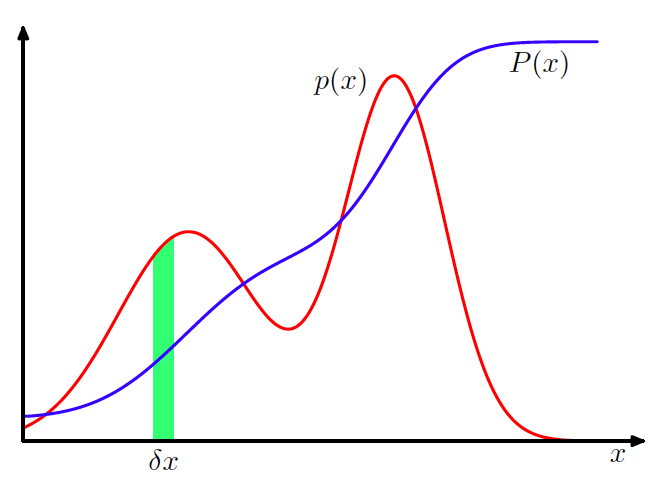

<center>图1.12 离散变量的概率内容可以扩展到连续变量$x$上的概率密度$p(x)$，$x$落在区间$(x,x+\delta x)$中的概率$p(x)dx$，其中$\delta x \to 0$。概率密度可以表示成累计概率函数$P(x)$的导数。</center>

因为概率是非负的，也因为值$x$必须在实数轴上，概率密度$p(x)$必须满足两个条件

$$p(x) \ge 0$$

$$\int_{-∞}^∞p(x)dx = 1$$

在一个变量的非线性变化下，一个概率密度的变换不同于简单的函数，因为雅克比矩阵。比如，如果我们考虑一个变量$x=g(y)$的变化，那么函数$f(x)$则变成了$\tilde f(y)=f(g(y))$。现在我们考虑一个概率密度$p_x(x)$对应新变量$y$的密度是$p_y(y)$，事实是，$p_x(x)$和$p_y(y)$是两个不同的密度。观测到落在区间$(x,x+\delta x)$中的，对于一个很小的$\delta x$值，被转换成区间$(y,y+\delta y)$，有$p_x(x) \backsimeq p_y(y)$，因此

$$\begin{align*}
p_y(y) &= p_x(x) \mid \frac{dx}{dy} \mid \\
&= p_x(g(y)) \mid g'(y) \mid
\end{align*}$$

这种形式的一个结果是，概率密度最大值的概念屈居于变量的选择。

$x$落在区间$(−∞, z)$之间的概率使用累积分布函数定义

$$P(z)=\int_{-∞}^zp(x)dx$$

如图中1.12所示，满足$P'(x)=p(x)$。

如果有几个连续变量$x_1, \cdots, x_D$，表示成向量$\mathsf{x}$，我们可以定义一个联合概率密度$p(\mathsf{x}=p(x_1, \cdots, x_D))$，$\mathsf{x}$的概率落在一个无穷小的量$\delta \mathsf{x}$包含点$\mathsf{x}$由$p(\mathsf{x}\delta \mathsf{x})$给出。这个多变量概率密度必须满足

$$p(\mathsf{x}) \ge 0$$

$$\int p(\mathsf{x})d\mathsf{x} = 1$$

其中积分占据了整个$\mathsf{x}$空间。我们也可以考虑联合概率分布在离散和连续变量上的组合。

我们知道如果$\mathsf{x}$是离散变量，$p(x)$有时候叫做概率质量函数，因为它可以看做是在允许的$x$值上的概率质量集合。

概率的加和和乘积规则，正如贝叶斯定理，这同样适用于概率密度的情况，或者是离散和连续变量的组合。比如，如果$x$和$y$是两个实数变量，那么加和和乘积规则可以是如下形式

$$p(x) = \int p(x,y)dy$$

$$p(x,y) = p(y \mid x)p(x)$$

一个正式的判断是连续变量的加和和乘积规则（Feller, 1966)需要属于数学的一个分支叫做度量理论，这在本书范围之外。然而，通过将每个实变量划分为宽度$\Delta$的区间，并考虑这些区间的离散概率分布，可以非正式地看出它的有效性。取极限$\Delta \to 0$，和会变成积分形式，给出需要的答案。

#### 1.2.2 期望和方差

涉及概率的最重要的运算就是找到加权平均函数。在概率分布$p(x)$下的平均值函数$f(x)$被称为$f(x)$的期望，将表示为$E[f]$。对于离散分布，则有

$$E[f]=\sum_xp(x)f(x)$$

所以平均值是不同$x$值的相关概率的加权。在连续变量中，期望值用相应概率密度的积分来表示

$$E[f]=\int p(x)f(x)dx$$

在任何一种情况下，如果我们从概率分布或概率密度中得到一个有限数量的$N$个数据点，那么这些数据点的期望被近似为有限数据的加和

$$E[f] \backsimeq \frac{1}{N}\sum_{n=1}^Nf(x_n)$$

在第11章，当我们讨论采样方法时，会扩展对其结果的使用。1.35中的近似会变成极限$N \to ∞$。

有时我们会考虑多变量函数的期望，这时候我们就会针对某个要计算平均的变量使用相应的下标，比如

$$E_x[f(x,y)]$$

表示的是对应的$x$分布的函数$f(x,y)$的平均。需要注意的是$E_x[f(x,y)]$它是$y$的函数。

我们也可以考虑条件期望来表示相应的条件分布，所以

$$E_x[f|y] = \sum_xp(x \mid y)f(x)$$

相似的定义也可以在连续变量上。

$f(x)$的方差可以定义成

$$\text{var}[f] = E[(f(x)-E[f(x)])^2]$$

它提供了一种在均值$E[f(x)]$的周围$f(x)$的变化量。将平方展开，我们可以看到方差可以写成$f(x)$的期望和$f(x)^2$的形式

$$\text{var}[f]=E[f(x)^2] - E[f(x)]^2$$

特殊情况，我们可以考虑变量$x$它本身，如下给出

$$\text{var}[x] = E[x^2] - E[x]^2$$

两个随机变量$x$和$y$，方差定义成

$$\begin{align*}
\text{cov}[x,y]&=E_{x,y}[\{x-E[x]\}\{y-E[y]\}] \\
&= E_{x,y}[xy] - E[x]E[y]
\end{align*}$$

这便是的是$x$和$y$一起变化的情况。如果$x$和$y$相互独立，它们的方差消失。

在随机变量$\mathsf{x}$和$\mathsf{y}$的两个向量中，协方差是一个矩阵

$$\begin{align*}
\text{cov}[\mathsf{x},\mathsf{y}] &= E_{\mathsf{x},\mathsf{y}}[\{\mathsf{x}-E[\mathsf{x}]\}\{\mathsf{y}^T-E[\mathsf{y}^T]\}]\\
&= E_{\mathsf{x},\mathsf{y}}[\mathsf{x}\mathsf{y}^T] - E[\mathsf{x}]E[\mathsf{y}^T]
\end{align*}$$

如果我们考虑向量$\mathsf{x}$个分量之间的协方差，我们可以使用一个更加简单的符号$\text{cov}[\mathsf{x}]\equiv\text{cov}[\mathsf{x},\mathsf{x}]$。

#### 1.2.3 贝叶斯概率

到目前为止，本章中我们就随机、可重复事件观察了概率。我们把这称为对概率的经典或频率的解释。现在我们转到更加通用的贝叶斯视角，它提供对概率不确定性的度量。

考虑一个不确定事件，比如月球是否曾经绕着太阳旋转，或是否北极冰层是否会在本世纪末消融。这些事件并不能像之前提到的盒子中的水果那样来重复多次来定义概率概念。尽管如此，我们会产生一些想法，比如，北极雪消融的速度。如果我们现在从一颗新的地球观测卫星上获得新的证据，例如收集新的诊断信息，我们可能会修正我们对冰损失率的看法。对于这种事情的评估，将对我们采取的行动产生影响，比如，会影响我们对减少温室气体排放所努力的程度。在这种情况下，我们希望能够量化我们的不确定性表达，并根据新的证据对不确定性进行精准的修正，而后我们因此也能够采取最优的动作或决策。这些我们都可以通过优雅的、通用的贝叶斯概率来解释。

然而，使用概率来表示不确定性并不是一种特别的选择，如果我们懂得常识，在做理性的连贯性推断中也是不可避免的。比如，1946年Cox展示了如果数值在使用来表示置信度时，一组简单的公理编码了这些置信的常识属性，从而独特地产生了一组规则来操纵相当于概率和和积规则的置信度。这也提供了一个严格的证据，证明概率论可以被视为布尔逻辑对涉及不确定性情况的扩展（Jaynes, 2003年）。许多其他作者也提出了这些不确定度量应该满足的不同属性或公理集（Ramsey，1931年；Good，1950年；Savage，1961年；Definetti，1970年；Lindley，1982年）。在每个例子中，得到的结果值都是精确根据概率规则的。因此，也很自如地称这些量为（贝叶斯）概率。

在模式识别领域，使用更加通用的概率知识会很有用。考虑多项式曲线拟合在1.1节讨论的例子。看上去使用概率里的频率来解释观测变量$t_n$的随机值很合理。然而，我们希望解决并量化围绕模型参数$\mathsf{w}$的适当选择的不确定性。我们可以看到，从贝叶斯推断来看，我们可以使用概率论机制来表示模型参数$\mathsf{w}$中的不确定性，或事实上是对模型本身的选择。

贝叶斯理论获得一个新的意义。回想水果盒子的例子，水果识别的观测提供了选中盒子是红色的概率的相关信息。在那个例子中，贝叶斯理论被用在通过结合观测数据提供的证据从先验概率转换成后验概率。过后我们会详细看到，我们可以使用一个近似方法来推断关于量化诸如在多项式曲线拟合例子中的参数$\mathsf{w}$。在观测到数据前，我们捕捉了我们对$\mathsf{w}$的假设，它是$p(\mathsf{w})$的一个先验概率形式。对于观测数据$\mathcal{D}=\{t_1,\cdots,t_N\}$的影响，可以通过条件概率$p(\mathcal{D} \mid \mathsf{w})$，在1.2.5节中我们会看到，这是如何精确表示的。贝叶斯理论可以表示成如下形式

$$p\left(\mathsf{w} \mid \mathcal{D}\right) = \frac{p\left(\mathcal{D} \mid \mathsf{w}\right)p\left(\mathsf{w}\right)}{p\left(\mathcal{D}\right)}$$

这使得我们可以在观测到数据$\mathcal{D}$在后验概率$p(\mathsf{w} \mid \mathcal{D})$形式后来评估$\mathsf{w}$的不确定性。

量$p(\mathcal{D} \mid \mathsf{w})$贝叶斯定理右半边是对观测数据集$\mathcal{D}$的评估，它可以看做是参数向量$\mathsf{w}$的函数，我们把它叫做似然函数。它表示的是对于不同参数向量$\mathsf{w}$观测到的数据集的可能性。需要注意的是似然它并不是在$\mathsf{w}$上的概率分布，它对$\mathsf{w}$的积分并不（必然）等于1。

给出似然函数的定义，我们可以用语言的形式来表示贝叶斯定义

$$\text{posterior}\varpropto\text{likehood} \times \text{prior}$$

所有的这些量都被看作是$\mathsf{w}$的函数。1.43中的分母它是一个标准化常量，它确保左半边的后验分布它是一个有效的概率密度，它的积分为1。事实上，对1.43的两边都对$\mathsf{w}$积分，我们可以使用贝叶斯定理中先验分布和似然函数部分来表示分母部分

$$p(\mathcal{D}) = \int p(\mathcal{D} \mid \mathsf{w})p(\mathsf{w})d\mathsf{w}$$

在贝叶斯和频率范式中，似然函数$p(\mathcal{D} \mid \mathsf{w})$占据重要的角色。然而，在这两种方法中，它的使用方式是根本不同的。在频率设置中，$\mathsf{w}$被考虑为是一个固定的参数，其值由某种形式的"估计量"确定，它在此评估上的误差线是考虑数据集$\mathcal{D}$的分布得到的。相比，从贝叶斯观点来看，它只有单个数据集$\mathcal{D}$（一般是实际观测到的），参数的不确定是通过$\mathsf{w}$的概率分布来表示的。

一个广泛使用的频率评估就是最大似然，$\mathsf{w}$就是最大似然函数$p(\mathcal{D} \mid \mathsf{w})$的一个集合。对于值$\mathsf{w}$的选择就是观测数据集概率的最大化。在机器学习文化中，负log似然函数被叫做误差函数。因为负log函数它是一个单调递减函数，最大化似然等价于最小化误差。

有一种方法能够定义频率误差线，那就是bootstrap（Efron，1979; Hastie等，2001），其中，创建了多个数据集，如下所示。假设我们的原始数据集由$N$个数据点$\mathsf{X}=\{\mathsf{x}_1,\cdots,\mathsf{x}_N\}$个组成。我们可以从$\mathsf{X}$中随机采样$N$个数据点来创建一个新的数据集$\mathsf{X_B}$，相应的会有替换，$\mathsf{X}$中的一些点会被$\mathsf{X_B}$替代，而其它一些在$\mathsf{X}$中的一些点会不在$\mathsf{X_B}$中。这个过程可以重复$L$次，每次都会生成$N$个数据点的共$L$个数据集，每次都是从原始数据集$\mathsf{X}$中采样。我们可以通过查看预测变量与不同bootstrap数据集之间的估计来评估统计参数评估的准确性。(说明：主要还是通过多次采样来减少单次最大似然评估带来的误差率，或者说相当于是在减少过拟合情况。)

贝叶斯观点的一个优点就是它自然地包含了先验知识。假设，比如，有一个看上去很光滑的硬币扔了三次，每次都是头朝上。一个使用经典的最大似然评估头朝上的概率应该就是1，这样以后所有仍头的概率就都是1了！相比而言，采用一个带有合理先验的贝叶斯方法
则不会产生一个相对极端的结论。

对于频率和贝叶斯的优缺点总存在很多的争议和争论，事实上单纯的使用频率或是贝叶斯视角都不能起到帮助作用。比如，对于贝叶斯方法的一个常见批评是，先验分布通常是基于数学上的便利性而不是作为任何先验置信的反应来选择的。有些人则认为，通过相关性依赖的先验选择的主观性总结被看做是一些困难问题的根源。减少对先验选择的依赖的一种动机称作非形成性先验。即便如此，当比较不同的模型时，这也会有困难，事实上贝叶斯方法如果基于差的先验选择，在高置信的情况下，也会得出差的结果。频率评估方法则避免了会出现这样的问题，技术上我们还是会这样的模型进行交叉验证也会更有用。

而这本书会更多地强调贝叶斯观点，在实践中贝叶斯方法也在这些年反应出更加强烈的增长趋势，如果需要我们也会讨论有用的频率理论。

尽管贝叶斯框架起源于18世纪，但长期以来，贝叶斯方法的实际应用严重受限于全贝叶斯程序执行困难。我们可以看到，为了做出预测或为了比较不同的模型，尤其是它需要边缘（加和或整合）所有参数空间。采样方法的发展，比如马尔科夫链蒙特卡洛（在11章讨论），随着计算机速度和内存容量的提高，在一系列的令人印象深刻的领域，打开了贝叶斯技术应用的大门。蒙特卡洛方法非常灵活，它可以广泛应用于各种模型。但是，它们的计算量很大，主要是用于小规模问题。

最近，诸如变分贝叶斯和期望传播（在第10章中讨论）等高效的确定性近似方法已经开发出来了。它提供了一个采样方法的替代补充方案，它使得贝叶斯技术可以应用到更大的范围的应用上。（Blei等人，2003年）。

#### 1.2.4 高斯分布

我们会致力于整个第二章来研究各种概率分布和它们的关键性质。方便起见，这里我们就减少一些最重要的连续变量的概率分布，我们称作正太或高斯分布。我们将在本章的其余部分以及本书的不部分内容中广泛使用这一分布。

对于单实值变量$x$的例子，高斯分布被定义成

$$\mathcal{N}\bigr(x \mid \mu, \sigma^2\bigr) = \frac{1}{\bigr(2\pi\sigma^2\bigr)^{1/2}}\text{exp}\left\{-\frac{1}{2\sigma^2}\bigr(x-\mu\bigr)^2\right\}$$

这里有两个变量：$\mu$，称其为均值，$\sigma^2$，称其为方差。方差的平方根，在只有$sigma$时，被称作标准方差，方差的倒数，被写作$\beta=1/\sigma^2$，被称为精度。等会儿我们会解释这些项。图1.13显示了一个高斯分布。

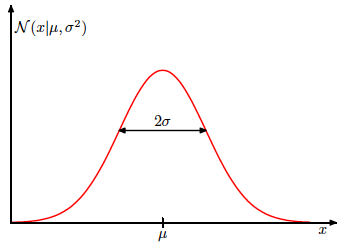

<center>图1.13 图中画出了单变量高斯均值$\mu$和标准差$\sigma$</center>

从1.46中我们看到高斯分布应满足

$$\mathcal{N}\bigr(x \mid \mu, \sigma^2\bigr) > 0$$

同时，它也直观地展示了高斯是被标准化后的，所以有

$$\int_{-∞}^∞\mathcal{N}\bigr(x \mid \mu, \sigma^2\bigr)dx = 1$$

对于一个有效的概率密度应满足两个条件。

我们可以方便地发现函数$x$在高斯分布下的期望，$x$的均值如下给出

$$\mathbb{E}[x]=\int_{-∞}^∞\mathcal{N}\bigr(x \mid \mu, \sigma^2\bigr)x dx = \mu$$

因为参数$\mu$代表的是$x$分布下的均值，它被称为均值。相似的，对于二次期望，

$$\mathbb{E}[x^2] = \int_{-∞}^∞\mathcal{N}(x \mid \mu, \sigma^2)x x^2 dx = \mu^2 + \sigma^2$$

从1.49和1.50，我们有$x$的方差如下表示

$\text{var}[x] = \mathbb{E}[x^2] - \mathbb{E}[x]^2 = \sigma^2$

因为$\sigma^2$被看做是方差参数。分布的最大化值也就是它的模式。对于一个高斯，这个模式与均值一致。

我们感兴趣的是一个$D$维向量$\mathsf{x}$的连续变量的高斯分布，如下表示

$$\mathcal{N}(\mathsf{x} \mid \mathsf{\mu}, \mathsf{\Sigma}) = \frac{1}{(2\pi)^{D/2}}\frac{1}{\mid \mathsf{\Sigma} \mid^{1/2}}\text{exp}\left\{-\frac{1}{2}\bigr(\mathsf{x}-\mathsf{\mu}\bigr)^T\mathsf{\Sigma}^{-1}\bigr(\mathsf{x}-\mathsf{\mu}\bigr)\right\}$$

这里$D$维向量$\mathsf{\mu}$被称为均值，$D \times D$矩阵$\mathsf{\Sigma}$称作方差，$\mid \mathsf{\Sigma} \mid$表示的是$\mathsf{\Sigma}$的行列式。在本章中，我们会使用多变量高斯分布来介绍，它的特性也将在第2.3节中介绍。

现在假设我们有一个观测数据集$\mathsf{x} = (x_1, \cdots, x_N)^T$，我们用表示$N$观测常量$x$来表示。需要注意的是我们使用符号$\mathsf{x}$来区别单个观测向量的特征维度$(x_1, \cdots, x_D)^T$，这个用$\mathbf{x}$来表示。我们假设得到的观测值均来自未知的均值$\mu$，方差$\sigma^2$的高斯分布，并都是相互独立的，我们可以从数据集中定义这些参数。得到的数据点如果是来自同一个分布，且相互独立的，被说到是独立同分布，这经常被写成i.i.d。我们已经看到两个相互独立事件的联合概率亦可以以每个独立事件的边缘概率积来表示。因为我们的数据集$\mathsf{x}$是独立同分布的，我们因此可以在给出$\mu$和$\sigma^2$的时候，以如下形式来写出数据集的概率

$$p(\mathsf{x} \mid \mu, \sigma^2) = \prod_{n=1}^N\mathcal{N}\bigr(x_n \mid \mu, \sigma^2\bigr)$$

当我们把$\mu$和$\sigma^2$看作是一个函数时，它是高斯的似然函数，图1.14大致地做出了解释。

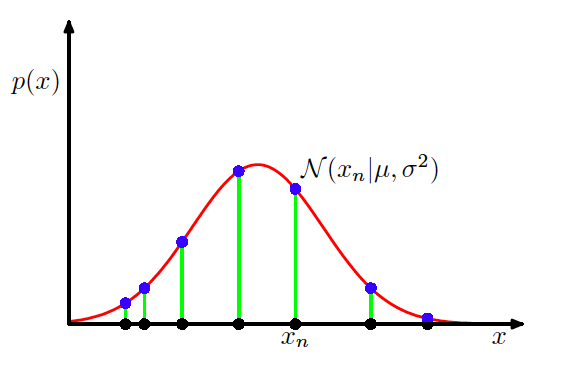

<center>图1.14 图中画的是高斯分布的似然函数，如红色曲线所显示的。这里黑色点表示的是值$\{x_n\}$数据集，似然函数1.53给出的对应到蓝色点的积分值。通过最大化似然调整高斯的均值和方差，以此得到最大化的积分。</center>

定义概率分布中的参数的一个通用标准就是使用观测数据集通过最大化似然函数来找到参数值。这个看上去很奇怪的标准，从我们之前讨论的概率论，它在给出数据最大化概率参数也是看上去很自然的，而不是给定参数的数据概率。事实上这两个标准是相关的，我们会在曲线拟合内容中讨论。

现在，尽管，我们会通过最大化似然函数1.53来定义高斯中未知参数$\mu$和$\sigma^2$的值。在实践中，最大化log似然函数也更方便。因为对数是其参数的单调递增函数，最大化对数函数等价于最大化原函数。使用对数不仅简化了后面的数学分析，同时也有助于数值计算，因为大量小概率的乘积很容易降低计算机的数值精度，这是通过计算而不是对数概率的总和来解决的。从1.46和1.53中，对数似然函数可以写成如下形式

$$\ln p(\mathsf{x} \mid \mu, \sigma^2) = -\frac{1}{2\sigma^2}\sum_{n=1}^N\bigr(x_n-\mu\bigr)^2 - \frac{N}{2}\ln\sigma^2 - \frac{N}{2}\ln(2\pi)$$

最大化1.54来表示$\mu$，我们得到最大化似然函数解给出如下

$$\mu_{\text{ML}} = \frac{1}{N}\sum_{n=1}^Nx_n$$

这是样本均值，比如，样本值$\{x_n\}$的均值。类似的，最大化1.54所表示的$\sigma^2$，我们获得最大化似然解所表示的方法如下形式

$$\sigma_{\text{ML}}^2 = \frac{1}{N}\sum_{n=1}^N\bigr(x_n-\mu_{\text{ML}}\bigr)^2$$

这是通过样本均值$\mu_{\text{ML}}$来度量的样本方差。需要注意的是我们同时对$\mu$和$\sigma^2$进行联合最大化(1.54)，但在该死分布的解决案例中，我们需要结构$\mu$的解和$\sigma^2$的解，以便我们可以先评估1.55，然后再用此结果评估1.56。

在本章的后面，同时在后面的章节，我们会突出最大化似然方法的局限性。这里我们给出单变量高斯分布的最大化似然参数的解决方案。特别的，我们得知最大化似然方法系统第低估了方差的分布。这是一个叫偏差现象的例子，它与第1.1节中的多项式曲线拟合中遇到的过河问题有关。我们首先需要注意的是最大化似然解$\mu_{\text{ML}}$和$\sigma_{\text{ML}}^2$它是数据集值$x_1, \cdots, x_N$的函数。考虑这些量所表示的数据集值的期望，它们这些都是来自于带参数$\mu$和$\sigma^2$的高斯分布。它直观地表示成如下

$$\mathbb{E}[\mu_{\text{ML}}] = \mu$$

$$\mathbb{E}[\sigma_{\text{ML}}^2] = \left(\frac{N-1}{N}\right)\sigma^2$$

所以平均来说，最大似然函数评估将会获得正确的均值，但是会低估实际的方差，会有一个乘子$(N-1)/N$。这个结果后面的直觉如图1.15所示。

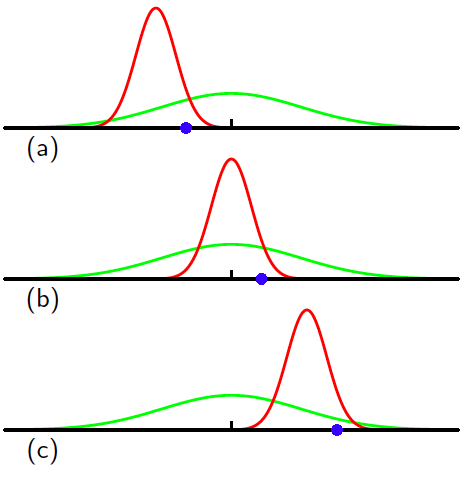

<center>图1.15 图中画出的是在使用最大似然定义高斯方差时，偏差是如何产生的。绿色曲线显示的是生成数据的正确的高斯分布，而三个红色曲线显示了在拟合三个数据集后得到的高斯分布，每个都是由使用最大化似然结果1.55和1.56的两个蓝色数据点组成。平均来看三个数据集，均值是正确的，而方差却白系统性地低估了，因为它使用了采样均值来度量，而不是实际的均值。（也就是采样均值它不是样本本身，存在误差。）</center>

从1.58中我们可以得到方差参数的无偏估计

$$\tilde{\sigma}^2 = \frac{N}{N-1}\sigma_{\text{ML}}^2 = \frac{1}{N-1}\bigr(x_n - \mu_{\text{ML}}\bigr)^2$$

在10.1.3节中，我们会看到当我们采用贝叶斯方法时，这个结果是如何自动产生的。

我们注意到最大似然解决方案的偏差会随着数据点$N$的增长而变得无意义，当$N \to ∞$时，最大似然解的方差等价于真实数据生成分布的方差。实际中，对于任何小于数量$N$的，偏差也不会成为一个很严重的问题。当然，在本书中我们感兴趣的也是更加复杂的模型，参数也更多，这时候偏差问题相关的最大似然也会更严重。事实上，正如我们看到的，过拟合问题的根本原因也就是最大似然偏差问题，这也是我们早些在多项式曲线拟合中提到的。

#### 1.2.5 曲线拟合再回顾

我们已经看到多项式曲线拟合问题可表示为错误最小化。这里我们回到曲线拟合例子，然后以概率推断的视角来看，增加一些新的视角到误差函数和正则化中，同时带领着沃恩进入全贝叶斯的领域。

曲线拟合问题的目标就是在给定一些输入变量$x$的新值，然后预测其目标变量$t$，它是基于由$N$个输入值$\mathsf{x}=(x_1, \cdots, x_N)^T$组成的训练集和它相应的目标值$\mathsf{t}=(t_1, \cdots, t_N)^T$。我们可以会用概率分布来表达在目标变量值上的不确定性。对于这个目的，我们假设，在给定值$x$时，相应的值$t$有一个高斯分布，带有的均值等价于1.1中的多项式曲线的值$y(x, \mathsf{w})$。因此我们有

$$p(t \mid x, \mathsf{w}, \beta) = \mathcal{N}(t \mid y(x, \mathsf{w}), \beta^{-1})$$

> 说明：这里有点难理解，为什么会有这个关系，其实我们假设误差项是满足标准正太分布的，而对于预测公式，则加上错误函数部分，它也满足高斯分布，故而有此。

这里，为了与以后章节的保持一致性，我们定义了一个精度参数$\beta$，它是分布方差的倒数。如示意图1.16所示。

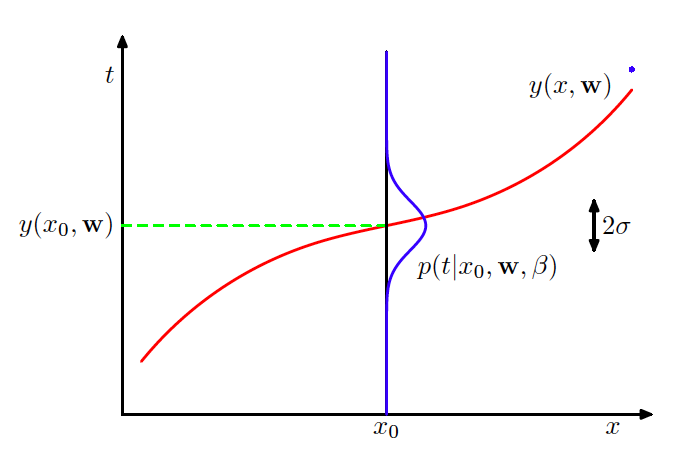

<center>图1.16 示意图显示的是一个高斯条件分布目标$t$，在给定$x$，如公式1.60中它的均值是由曲线函数$y(x, \mathsf{w})$给出的，精度是由参数$\beta$给出的，关联到变量有$\beta^{-1}=\sigma^2$</center>

我们现在使用训练集数据$\{\mathsf{x,t}\}$通过最大似然来定义未知参数$\mathsf{w}$和$\beta$。如果数据假设独立采样于1.60分布中，那么有如下给出的似然函数

$$p(\mathsf{t} \mid \mathsf{x}, \mathsf{w}, \beta) = \prod_{n=1}^N\mathcal{N}(t_n \mid y(x_n, \mathsf{w}), \beta^{-1})$$

正如早期的简单贝叶斯分布中的例子，我们很容易想到使用最大化对数似然函数。带入高斯分布的公式，如1.46给出的，我们会得到如下对数似然函数

$$\ln p(\mathsf{t} \mid \mathsf{x}, \mathsf{w}, \beta) = -\frac{\beta}{2} \sum_{n=1}^N\left\{y(x_n,\mathsf{w})- t_n\right\}^2 + \frac{N}{2}\ln\beta - \frac{N}{2}\ln(2\pi)$$

考虑之前多项式系数最大化似然解的定义，表示成$\mathsf{w}_{\text{ML}}$。我们通过最大化1.62来确定相应的$\mathsf{w}$。为了这个目的，我们可以去掉右侧最后两项，因为它不依赖于$\mathsf{w}$。同时，我们注意到对数似然通过一个正的常量系数不会改变最大值$\mathsf{w}$的确定，所以我们可以将系数$\beta/2$替换成$1/2$。最后，我们可以看到，取而代之的最大化对数似然，等价于最小化负对数似然。就确定$\mathsf{w}$而言，最小化1.2中定义的平方和误差函数是等价于最大化似然函数的。因此平方和误差函数是在高斯噪声分布最大化似然下产生的。

我们可以使用最大化似然函数来定义高斯条件分布的精度参数$\beta$。最大化1.62确定的$\beta$如下显示

$$\frac{1}{\beta_{\text{ML}}} = \frac{1}{N}\sum_{n=1}^N\{y(x_n,\mathsf{w}_{\text{ML}}) - t_n\}^2$$

同样我们先定义表示均值参数变量$\mathsf{w}_{\text{ML}}$，随后使用这个值来找到精度$\beta_{\text{ML}}$，正如简单贝叶斯分布的例子一样。

已经定义了参数$\mathsf{w}$和$\beta$，我们现在可以来预测新值$x$了。因为现在我们有了概率模型，这些可以表示为在给出关于$t$的概率分布的预测分布，而不是简单的点估计，我们将这些代入到最大似然函数中则有

$$p(t \mid x, \mathsf{w}_{\text{ML}}, \beta_{ML}) = \mathcal{N}(t \mid y(x, \mathsf{w}_{\text{ML}}), \beta_{\text{ML}}^{-1})$$

现在让我们朝着贝叶斯方法迈进一步，介绍多项式系数$\mathsf{w}$的先验分布。为了简单起见，让我们考虑如下高斯分布公式

$$p(\mathsf{w} \mid \alpha) = \mathcal{N}(\mathsf{w} \mid \mathsf{0}, \alpha^{-1}\mathsf{I}) = \left(\frac{\alpha}{2\pi}\right)^{(M+1)/2} \text{exp} \left\{-\frac{\alpha}{2}\mathsf{w}^T\mathsf{w}\right\}$$

这里$\alpha$是分布的精度，$M+1$是对于$M$次多项式向量$\mathsf{w}$中所有元素的个数。变量$\alpha$，是控制模型参数的分布的，我们称其为超参数。使用贝叶斯定理，后验分布$\mathsf{w}$与先验分布的积是正比例的，似然函数如下

$$p(\mathsf{w} \mid \mathsf{x}, \mathsf{t}, \alpha, \beta) \varpropto p(\mathsf{t} \mid \mathsf{x}, \mathsf{w}, \beta)p(\mathsf{w} \mid \alpha)$$

我们现在可以通过找到在给定数据下最大可能的$\mathsf{w}$值来定义$\mathsf{w}$，换句话来说就是通过最大化后验分布。这种技术我们成为最大化后验，或者简写为MAP。取1.66的负对数，然后结合1.62和1.65，我们找到最大化后验就是如下给出的最小化

$$\frac{\beta}{2}\sum_{n=1}^N\left\{y(x_n,\mathsf{w}) - t_n\right\}^2 + \frac{\alpha}{2}\mathsf{w}^T\mathsf{w}$$

因此我们可以看到最大化后验分布等价于最小化正则化平方和误差函数，这在1.4公式中有涉及到过，带着一个正则化参数通过$\lambda=\alpha/\beta$给出。

#### 1.2.6 贝叶斯曲线拟合

尽管我们已经包括了先验分布$p(\mathsf{w} \mid \alpha)$，但到目前为止，我们仍然是对$\mathsf{w}$进行了点估计，因此这还不等于贝叶斯处理。在全贝叶斯方法中，我们应该需要使用概率加和和乘积规则，这就要求，正如我们稍后将看到的，我们对$\mathsf{w}$的所有制进行积分。这种边缘化是贝叶斯模式识别方法的核心。

在曲线拟合问题中，我们给顶训练数据$\mathsf{x}$和$\mathsf{t}$，联通一个新测试点$x$，我们的目标就是预测值$t$。我们因此期望评估预测分布$p(t \mid x, \mathsf{x}, \mathsf{t})$。这里我们应该假设参数$\alpha$和$\beta$是事先知道的，并且是固定的（后面章节我们会讨论如何从数据中在贝叶斯环境中推断这些参数的。）

贝叶斯处理简单地对应于概率和与积规则的已知性应用，它允许预测分布可以写成如下形式

$$p(t \mid x, \mathsf{x}, \mathsf{t}) = \int p(t \mid x, \mathsf{w})p(\mathsf{w} \mid \mathsf{x}, \mathsf{t}) d \mathsf{w}$$

这里$p(t \mid x, \mathsf{w})$由1.60给出，这里我们简化了$\alpha$和$\beta$符号的相关性。这里$p(\mathsf{w} \mid \mathsf{x}, \mathsf{t})$是参数上的后验分布，可以在1.66中的右半边找到。我们可在3.3节中看到，曲线拟合例子这样的问题，它的后验分布是一个高斯，可以通过分析来评估。类似的，1.68中的积分可以用解析的方法进行，其结果是预测分布由高斯形式给出

$$p(t \mid x, \mathsf{x}, \mathsf{t}) = \mathcal{N}(t \mid m(x), s^2(x))$$

这里的均值和方差如下给出

$$m(x) = \beta\phi(x)^T\mathsf{S}\sum_{n=1}^N\phi(x_n)t_n$$

$$s^2(x) = \beta^{-1} + \phi(x)^T\mathsf{S}\phi(x)$$

这里的矩阵给出如下

$$\mathsf{S}^{-1} = \alpha\mathsf{I} + \beta\sum_{n=1}^N\phi(x_n)\phi(x)^T$$

这里的$\mathsf{I}$是单位矩阵，我们已经定义了向量$\phi(x)$带有多个元素$\phi_i(x)=x^i, i=0, \cdots, M$。

我们看到方差，和均值，其中1.69中的预测分布取决于$x$。1.71中的第一项表示由于目标变量上的噪声而导致$t$的预测值的不确定性，并通过$\beta_{\text{ML}}^{-1}$的最大似然预测分布得以表示。然而，第二项来自参数$\mathsf{w}$的不确定性，因此它是贝叶斯处理的结果。合成正弦回归问题的预测分布如图1.17所示。

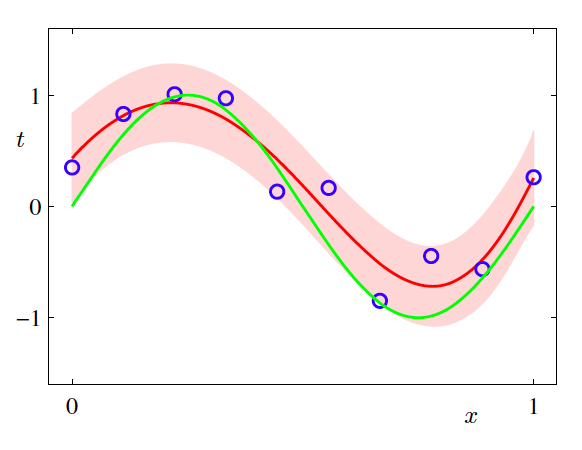

<center>图1.17 预测分布结果来自贝叶斯处理$M=9$次幂的多项式曲线拟合，固定参数$\alpha=5 \times 10^{-3}$和$\beta=11.1$（对应到已知的噪声方差），红色曲线表示的是预测分布的均值，红色区域它是围绕着均值$\pm 1$方差间距。</center>

#### 1.3 模型选择

在我们的例子中，多项式曲线拟合使用最小二乘，我们看到会有一个最优多项式次幂，这个次幂可以给到最好的泛化。多项式的次幂控制模型中自由参数的数量，进而表示模型的复杂度。利用正则化的最小二乘，正则化系数$\lambda$也会控制模型有效复杂度，而对于更复杂的模型，如混合分布或神经网络，可能存在多个控制复杂度的参数。在实际应用中，我们需要定义这种参数值，这样做的主要木鼻癌通常是在新数据上实现最佳的预测性能。此外，在给定模型中寻找复杂度参数的适当值，我们可能洗完考虑一系列不同类型的模型，以便找到适合我们特定应用的最佳模型。

我们已经看到，在最大化似然方法中，训练集的性能并不是在未知数据上的预测性能的一个好的指标，因为存在过拟合过拟合问题。如果数据很多的话，那么有一种方法是简单地使用一些可用的数据来训练一系列模型，或者是在给定模型，其复杂度参数值范围很广，我们可以使用独立的数据来进行比较，有时我们称它为验证集，最后我们选择其中有最优预测性能的参数。如果模型设计有使用一个有限大小的数据集来迭代多次的话，那么过拟合问题可能会影响到验证集，所以我们很有必要使用第三个测试集来作为最终模型选择的性能评估。

尽管如此，在许多应用中，我们锁呢鞥提供的训练和测试数据都是有限，为了创建一个好的模型，我们希望尽量多地使用可用的数据来作训练。但是，如果验证集很小的话，反而可能会给预测性能的带来噪声评估。一个好的解决办法就是使用交叉验证，如图1.18中画出的那样。在使用所有的数据来评估性能时，它允许$(S-1)/S$比例的可用数据被用于训练。当数据尤其少时，考虑$S=N$的情况是适当的，这里的$N$是整个数据点的数目，这就是留一法技术。

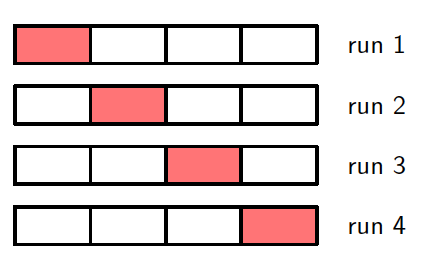

<center>图1.18 $S$折交叉验证技术，这里以$S=4$为例，包含取出的可用数据，将其划分成$S$个组（在简单例子中等价于样本数。）$S-1$组被用于模型的训练，剩下的用户验证。这个过程被重复所有$S$个可能选择的留出组，这里以红色块表示，然后将所有结果取平均值，即为性能分数。</center>

交叉验证的一个主要的缺点就是训练的次数必须是$S$这个因子来确定的，这对于训练模型本身计算复杂的情形是有问题的。另一个问题是，对于使用单独数据评估性能的交叉验证等技术，我们可能有单个模型的多个复杂度参数（例如，可能有多个正则化参数）。在最坏的情况下，探索这些参数的组合设置可能需要大量的训练，这些训练次数是参数数量的指数级别的。显然，我们需要更好的方法。在理想情况下，这应该只依赖于训练数据，并且应该允许在一次训练中比较多个超参数和模型类型。我们因此需要找到一种性能度量，可以只依赖于训练数据，不会因为过拟合而影响偏差。

历史上，人们提出了各种各样的"信息标准"，试图通过增加惩罚项来弥补更复杂模型的过拟合，从而可以纠正最大似然的偏差问题。比如，Akaike信息标准或AIC（Akaike，1974年）选择的模型的标准

$$\ln p(\mathcal{D} \mid \mathsf{w}_{\text{ML}}) - M$$

是最大的。这里的$p(\mathcal{D} \mid \mathsf{w}_{\text{ML}})$是最佳拟合的对数似然，$M$是在模型中可调参的数量。这个标准的变种，叫做贝叶斯信息标准，或BIC，将在4.4.1节讨论。然而，此类标准并未考虑模型参数的不确定性，在实践中，它们倾向于过于简单的模型。因此，我们将在第3.4节转向全贝叶斯方法，在这里我们将看到复杂性惩罚是如何以自然和原则的方式出现的。

#### 1.4 维度灾难

在多项式曲线拟合例子中我们只有一个输入变量$x$。在模式识别的实践应用，我们不得不处理包含许多输入变量的高维空间。正如我们现在讨论的，这带来了一些严重的挑战，是影响模式识别技术设计的一个重要因素。

为了说明这个问题，我们考虑一个综合生成的数据集代表从含有混合油、谁和天然气的管道中获得的测量值（Bishop和James，1993年）。这三种材料可存在于三种不同集合结构中的一种，即“均质”、“环形”和“层状”，三种材料的成分也可能不同。每个数据点包括一个12维输入向量，该向量由穿过管道的窄光束的伽马射线衰减密度计测量的测量值组成。这个数据集的详细描述减附录A。图1.19中有100个数据集中的数据点，画出的只有其中的两个度量值$x_6$和$x_7$（剩余的10个输入都在这个图中被忽略了）。每个数据点都根据它所属的三个几何类中的哪一个进行标记，我们的目标是将这些数据用作训练集，以便能够对新的观测（$x_6$,$x_7$）进行分类，如图1.19中的十字表示的观测。我们观测到在十字周围的大多数都是红色点，所以我们可能会假设这些点属于红色类别。但是，也有很多绿色点在附近，所以我们也可能会想它属于绿色类别。看上去它并不属于蓝色类别，这里的直觉是十字的识别应该是由它附近点较多，距离远的点较多的训练集所定义的。事实上，这种直觉也是合理的，我们将在后续章节讨论。

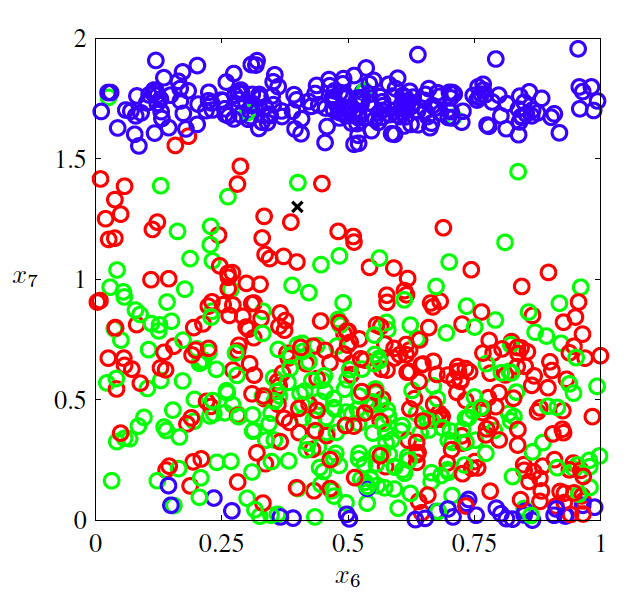

<center>图1.19 图中是输入变量$x_6$和$x_7$的数据流散点，红色表示的是"均质"类，绿色表示的是"环形"类，蓝色表示的"层状"类。我们的目标就是区分出新的测试数据点x的类别。</center>

我们怎么将这个直觉转到学习算法中呢？一个非常简单的方法就是讲输入空间划分成一般的单元，如图1.20中所示。当我们给定一个测试点，我们希望预测它的类别，我们首先决定它应该属于哪个单元，然后我们发现所有的训练数据点都会落在各自的单元中。测试点的识别被预测为与大多训练点在同样的单元中的类别。

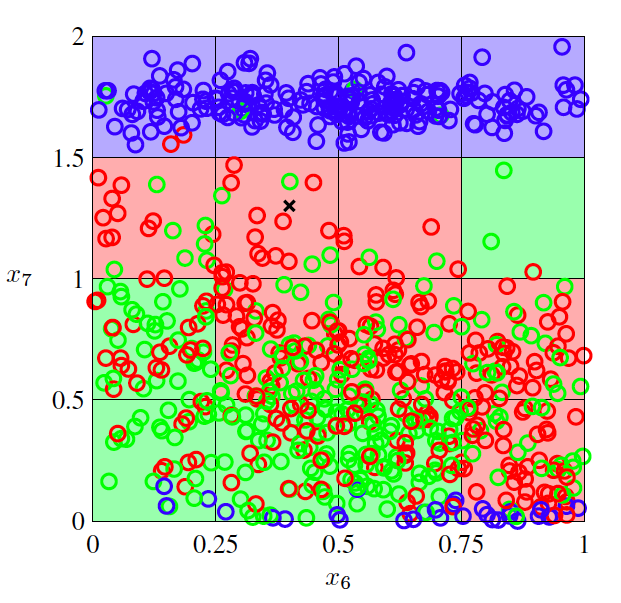

<center>图1.20 图中绘制的是一个简单的分类问题的解决方法，将输入空间划分成多个单元，任何新的测试点被分成的类别，该类别应该是在这个单元具有最多数目的类别。我们过后会看到，这个简单的方法也会存在一些缺陷。</center>

这种方法有很多问题，但当我们考虑它的扩展问题，有较大的输入变量时，这个问题就会变得很明显，这与更高维度的输入空间相对应的。图1.21中描述了这个原始问题，它展示了，如果我们将一个区域划分成多个单元，这样的单元数量会随着维度空间的增长呈现出指数级增长。问题就是指数级的单元，我们就需要有指数级数量的训练集，以确保所有单元不存在空的数据点。很明显，我们不希望将这种技术应用于多个变量的空间，因此我们需要找到一种更复杂的方法。

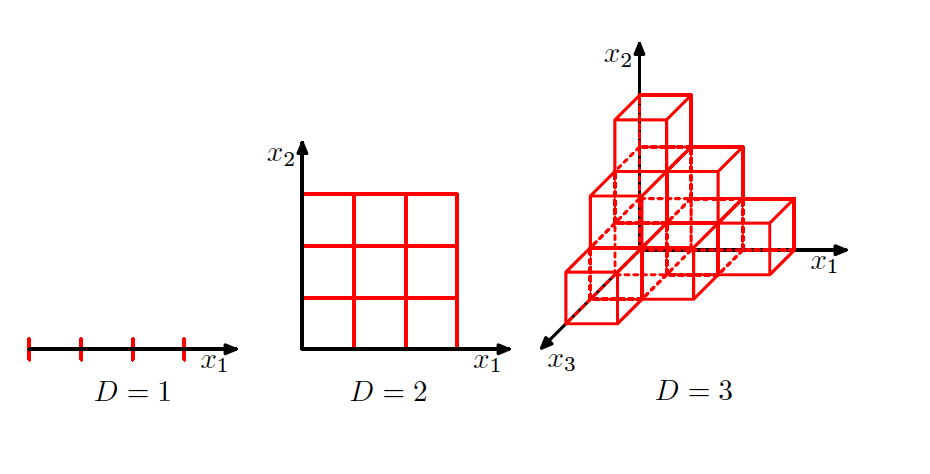

<center>图1.21 画的是维度爆炸问题，显示的是随着维度$D$空间的指数级增长网格区域数量的变化的。为了弄清楚，图中仅显示了$D=3$的立方体区域的子集。</center>

我们可以进一步思考高维度空间问题，回到我们的多项式曲线拟合的例子，考虑如何将这个方法扩展到处理有多个变量的输入空间中。如果我们有$D$个输入变量，一个有着3次幂的多项式系数的公式如下

$$y(x,\mathsf{w}) = w_0 + \sum_{i=1}^Dw_ix_i + \sum_{i=1}^D\sum_{j=1}^Dw_{ij}x_iw_j + \sum_{i=1}^D\sum_{j=1}^D\sum_{k=1}^Dw_{ijk}x_ix_jx_k$$

随着$D$的增长，独立参数的数量（并不是所有的系数都是独立的，因为$x$变量之间的存在对称性）会成比例增长于$D^3$。实际上，为了捕捉数据中复杂相关性，我们需要使用一个更高次的多项式。对于一个$M$次的多项式，系数数目的增长就如$D^M$。尽管是一个幂级增长，而不是指数级增长，但它仍然在不断变得更慢，实用性也很有限。

我们的几何直觉，我们生活的空间它是一个三维空间，当我们考虑更高维度的空间时，是不可行的。有一个简单的例子，考虑$D$维空间中半径为$r=1$的球体，然后问在半径$r=1-\epsilon$和$r=1$之间的球体的体积是多少。我们可以评估这个积分，通过观察球体半径为$r$在$D$维空间中的的体积缩放为$r^{D}$，我们可以写成

$$V_D(r) = K_Dr^D$$

这里的常量$K_D$只依赖于$D$。因此要求的积分如下表示

$$\frac{V_D(1)-V_D(1-\epsilon)}{V_D(1)} = 1-(1-\epsilon)^D$$

图1.22中画出了对于各种值$D$的$\epsilon$的函数。我们可以看到，对于大的$D$，小的$\epsilon$来说，这个值会趋于1。所以说，在高维空间中，球体的大多数体积都集中在一个很薄的壳表面！

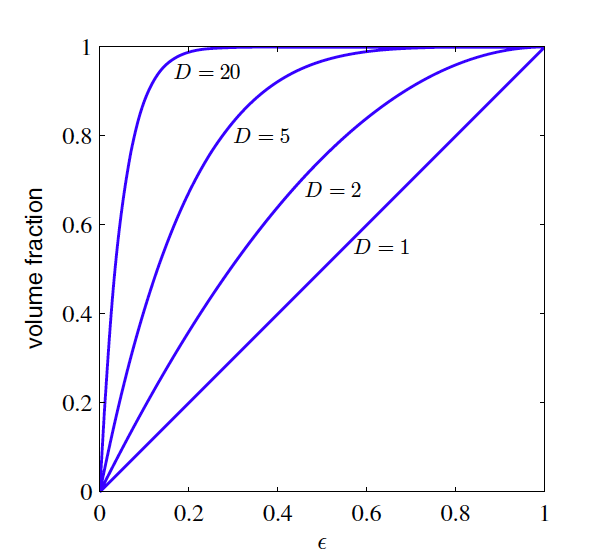

<center>图1.22 图中画的是球体在范围$r=1-\epsilon$到$r=1$之间的各种维度$D$的体积。</center>

再举一个与模式识别相关的例子，考虑高斯分布在高维空间行为。如果我们从笛卡尔坐标系转到极坐标系，然而整合成方向向量，我们会得到半径$r$的函数的密度$p(r)$的表达式。
因此，$p(r)\delta r$是位于半径$r$处厚度为$\delta r$的薄壳内的概率质量。图$1.23$中画出的各种$D$值的分布，我们看到对于$D$值大的高斯概率密度都是集中在一个薄的壳上。

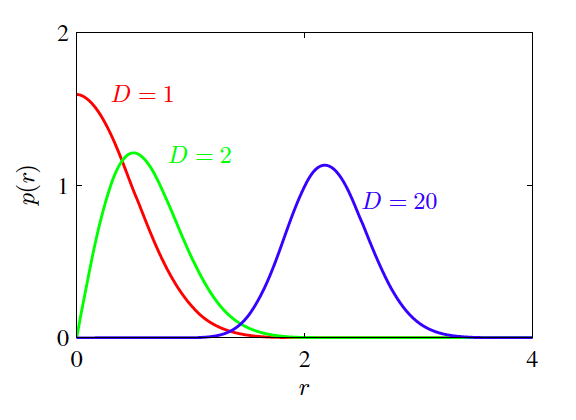

<center>图1.23 图中表示是半径$r$各维度$D$的概率分布。在高维度空间中，大多数高斯概率质量都集中在指定半径的壳上。</center>

在许多维度空间中有时会出现的困难被称为维度爆炸（Bellman，1961年）。在这本书中，我们将广泛使用涉及一维或二维输入空间的示例，因为这通过图形化表示这些技术是相对容易的。然而，读者需要注意的是，并非所有在低维空间中开发出来的可视化都能表达多维空间。

虽然维度爆炸确实是模式识别应用中的重要问题，它也不会阻止我们找到适合高维度空间的有效技术。这个的原因是双方面的。首先，真实数据通常被限制在有效维数较低的空间区域，尤其是重要变量在目标变量方向上发生变化时，可能会受到限制。第二，真实数据通常会表现出一些平滑特性（至少是局部的），因此在大多数情况下，输入变量的微小变化会对目标变量产生微小的变化。因此，我们可以利用类似于局部插值的急速来预测输入变量的新值的目标变量。成功的模式识别技术会利用一个或多个这些特性。考虑这样的例子，一个在制造业中的应用，在传送带上捕获相同平面物体的图像，目的是确定它们的方向。每个图像都是高维空间中的一个点，它的维度是由像素的个数决定的。因为物体可能出现在图像中的不同位置和不同方向上，图像之间有三个可变的自由度，一组图像将生活中三维流形嵌入到高维空间中。由于对象位置或方向与像素强度之间的复杂关系，这个流形将是高度非线性的。如果目标是学习一个可以输入图像，输出这个图像无论位置的方向的模型，所以流形中只有一个重要的变化自由度。

#### 1.5 决策理论

我们已经在第1.2节中看到了概率论如何为我们提供一个一致的数学框架来量化和操作不确定性。这里我们转向讨论决策论，当我们与概率论相结合时，这使得我们可以在涉及不确定的情况下爱做出最佳决策，例如在模式识别中遇到的不确定性。

假设我们有一个输入向量$\mathsf{x}$和相应的目标向量$\mathsf{t}$，我们的目标就是在给定一个新值$\mathsf{x}$来预测$\mathsf{t}$。对于回归问题，$\mathsf{t}$包含多个连续变量，而对于分类问题$\mathsf{t}$代表的是类别标签。联合概率分布$p(\mathsf{x}, \mathsf{t})$提供了一个对于关联这些变量的不确定的完整概述。从一组训练数据中定义$p(\mathsf{x}, \mathsf{t})$一个例子的推断，一般来说也是一个非常困难的，这也是这本书要解决的主题。在实践应用中，我们必须得到一个特性$\mathsf{t}$的值，或者更通用是在基于对$\mathsf{t}$的理解后，采取一个指定的动作，这个也是决策论中的内容。

考虑这样的例子，一个医疗诊断问题，我们会拍摄病人的X站牌，我们希望定义是否这个病人是否有癌症。在这个例子中，输入向量$\mathsf{x}$是图像中像素的强度，输出向量$t$表示的有癌症，我们用类别$\mathcal{C}_1$表示，或者不存在癌症，我们使用类别$\mathcal{C}_2$来表示。我们可能，比如，选择$t$是一个二进制变量，$t=0$表示类别$\mathcal{C}_1$，$t=1$表示是类别$\mathcal{C}_2$。后面我们会看到这种标签的选择对于概率模型来说是特别方便的。一般的推断问题会涉及到定义联合概率$p(\mathsf{x}, \mathcal{C}_k)$，或等价于$p(\mathcal{x}, t)$，它给了我们大部分完整概率的描述。虽然这是一个非常有用，也给了我们很多信息量，在最终我们必须决定是否给病人治疗，我们会期望这个选择在某些合理的感觉下是最优的(Duda和Hart, 1973年)。这就是决策步骤，决策理论的主题高速我们怎么在给出合理概率下做出最优选择。一旦我们解决了推断问题，我们会看到决策这步其实也很简单，甚至会微不足道的。

这里我们对于本书剩余部分会减少一些决策理论的关键思想。它的背景知识，会有更多的信息，我们可以再Berger（1985年）和Bather（2000年）中找到。

再给出详细分析前，让我们首先非正式地考虑一下我们如何期望概率在决策中发挥作用的。当我们得到新病人的X光线的照片时，我们的目标就是决定这个照片它属于哪个类别。我们感兴趣的是图片这两个类别的概率，通过$p(\mathcal{C}_k)$给出。使用贝叶斯理论，这些概率可以表示成如下

$$p(C_k \mid \mathbf{x}) = \frac{p(\mathbf{x} \mid \mathcal{C}_k)p(\mathcal{C}_k)}{p(\mathbf{x})}$$

我们可以注意到在贝叶斯定理中出现的任何量都可以使用联合概率的边缘化或条件概率来表示相应的变量。我们先解释$p(\mathcal{C}_k)$作为类别$\mathcal{C}_k$的先验概率，$p(\mathcal{C}_k \mid \mathbf{x})$为相应的后验概率。因此$p(\mathcal{C}_1)$表示的是，在我们拍摄$X$光之前，预测这个人患有癌症的概率。类似的，$p(\mathcal{C}_1 \mid \mathbf{x})$是在使用贝叶斯定理也就是在包含$X$光提供的信息后的概率。如果我们的目标是最小化分配给$\mathbf{x}$的错误率，直觉上我们会选择有着较高后验概率的类别。现在我们来证明这个直觉是正确的，我么也会讨论一些通用的决策标准。

#### 1.5.1 最小化误分类率

假设我们的目标是尽量少地误分类。我们需要有一个可以分配每个$\mathbf{x}$值到可用类别的规则。这种规则将输入空间划分成区域$\mathcal{R}_k$，称作决策区域，对于每个类别来说，这样的所有在$\mathcal{R}_k$会被分配给类别$\mathcal{C}_k$。在决策区域间的边界我们称其为决策边界或决策平面。需要注意的是每个决策区域并不需要是连续的，但可以是多个不想交的区域组成。在本章后面我们会提到决策边界和决策区域的例子。为了找最佳的决策规则，考虑头两个类别的所有例子，以癌症问题为例。当输入向量属于类别$\mathcal{C}_1$却被分配给了类别$\mathcal{C}_2$，误差就产生了，反之亦然。误分类发生的概率如下给出

$$\begin{align*}
p(\text{mistake}) &= p(\mathbf{x} \in \mathcal{R}_1, \mathcal{C}_2) + p(\mathbf{x} \in \mathcal{R}_2, \mathcal{C}_1) \\
&= \int_{\mathcal{R}_1}p(\mathbf{x},\mathcal{C}_2)d\mathbf{x} + \int_{\mathcal{R}_2}p(\mathbf{x},\mathcal{C}_1)d\mathbf{x}
\end{align*}$$

我们可以很自由地选择决策规则可以分配每个数据点$\mathbf{x}$给两个类别中的一个。显然，为了最小化$p(\text{mistake})$，我们应该对于每个$\mathbf{x}$分配到的1.78中类别积分值要尽量小。因此，如果给定的$\mathbf{x}$值，$p(\mathbf{x}, \mathcal{C}_1) > p(\mathbf{x}, \mathcal{C}_2)$，我们应该将类别$\mathcal{C}_1$分配给$\mathbf{x}$。从概率的乘积规则中，我们有$p(\mathbf{x},\mathcal{C}_k) = p(\mathcal{C}_k \mid \mathbf{x})p(\mathbf{x})$。因为对于两者的乘子$p(\mathbf{x})$是一样的，我们可以说成这个结果的最小化误分类概率，其实也就是对于每个$\mathbf{x}$被正确分类的后验概率$p(\mathcal{C}_k \mid \mathbf{x})$最大化。这个结果如图1.24中单输入向量$x$和它的两种类别所示。

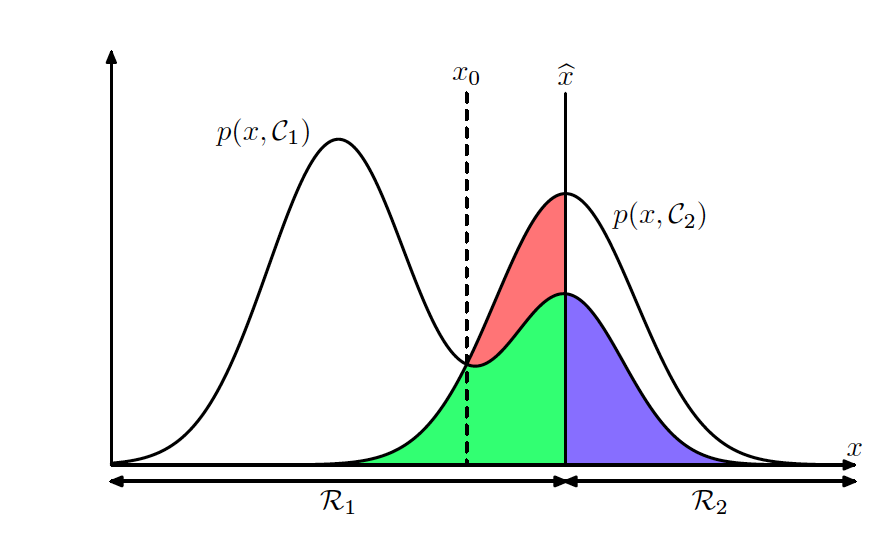

<center>图1.24 示意图中画的是两个类别的每个类别的联合概率$p(x, \mathcal{C}_k)$，同时有决策有决策边界$x=\hat{x}$。如果值$x \ge \hat{x}$则被分类为类别$\mathcal{C}_2$，因此他属于决策区域$\mathcal{R}_2$，而对于值$x < \hat{x}$的话，则被分类为$\mathcal{C}_1$，属于$\mathcal{R}_1$。蓝色和绿色区域是误分类部分，所以对于$x < \hat{x}$错误的是属于类别$\mathcal{C}_2$的点呗误分类为$\mathcal{R}_1$（红色和绿色部分的面积），相应地，对于在区间$x \ge \hat{x}$中的点是因为属于类别$\mathcal{C}_1$却被误分类为$\mathcal{C}_2$（代表的是蓝色部分）。如果变动决策边界$\hat{x}$的位置，对于蓝色和绿色区域部分的组合面积保持不变，而红色部分的大小会发生变化。最优的$\hat{x}$的选择就是曲线$p(x, \mathcal{C}_1)$和$p(x, \mathcal{C}_2)$的交叉处，相应的有$\hat{x}=x_0$，因为在这个位置红色区域会消失。这等价于最小化误分类率规则，会将每个$x$值分配给拥有较高后验概率$p(\mathcal{C}_k \mid x)$的类别。</center>

对于更通用的$K$类别例子，它最大化正确概率也很容易像如下写出

$$\begin{align*}
p(\text{correct}) &= \sum_{k=1}^Kp(\mathbf{x} \in \mathcal{R}_k, \mathcal{C}_k) \\
&= \sum_{k=1}^K\int_{\mathcal{R}_k}p(\mathbf{x},\mathcal{C}_k)d\mathbf{x}
\end{align*}$$

当区域$\mathcal{R}_k$被选中最大化时，也就是每个$\mathbf{x}$被分配给类别$p(\mathbf{x}, \mathcal{C}_k)$的最大化。同时，我们使用乘积规则$p(\mathbf{x}, \mathcal{C}_k) = p(\mathcal{C}_k \mid \mathbf{x}）p(\mathbf{x})$，对于所有项来说，乘子$p(\mathbf{x})$也都是一样，我们可以看到每个$\mathbf{x}$被分配的类别应该由最大化后验概率$p(\mathcal{C}_k \mid \mathbf{x})$。